In [1]:
#importing necessary items
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [78]:
#importing the dataset
df=pd.read_csv("Telecom_Customer_Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [79]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [80]:
print("The dataset is having",df.shape[0],"rows and",df.shape[1],"columns in the dataset.")

The dataset is having 7043 rows and 21 columns in the dataset.


From all the columns 'customerID' ,'Partner' and 'Dependents' are having less importance for the prediction, so for now lets drop these columns.

In [81]:
d=df   #keeping the original data safe

In [82]:
df.drop(['customerID','Partner','Dependents'],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
print("Now the shape of dataset is",df.shape)

Now the shape of dataset is (7043, 18)


In [84]:
#checking for null values
df.isnull().sum()

gender              0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

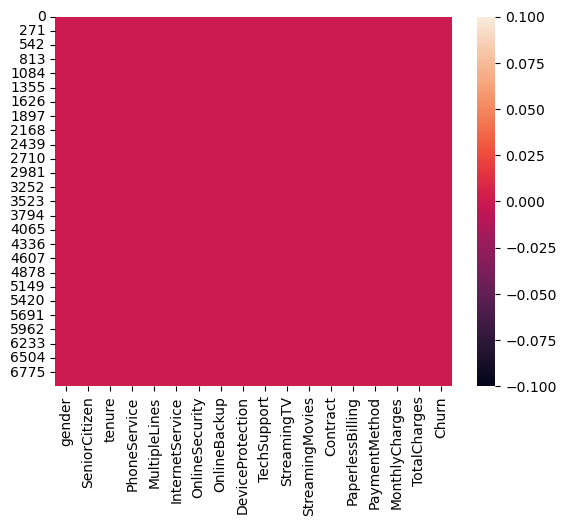

In [85]:
#visualizing null values
sns.heatmap(df.isnull())

Here we can see there are no null values in the dataset.

In [86]:
#checking duplicate values
df.duplicated().sum()

34

Since there are duplicate values and the number is very less, lets drop them and proceed.

In [88]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Description

In [89]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7009.000000,7009.000000,7009.000000
mean,0.162505,32.523327,64.895534
std,0.368940,24.521349,30.062458
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [90]:
df.describe(include="O")

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7009,7009,7009,7009,7009,7009,7009,7009,7009,7009,7009,7009,7009,7009,7009
unique,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3533,6327,3357,3087,3484,3075,3081,3459,2796,2771,3841,4155,2355,11,5158


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7009 non-null   object 
 1   SeniorCitizen     7009 non-null   int64  
 2   tenure            7009 non-null   int64  
 3   PhoneService      7009 non-null   object 
 4   MultipleLines     7009 non-null   object 
 5   InternetService   7009 non-null   object 
 6   OnlineSecurity    7009 non-null   object 
 7   OnlineBackup      7009 non-null   object 
 8   DeviceProtection  7009 non-null   object 
 9   TechSupport       7009 non-null   object 
 10  StreamingTV       7009 non-null   object 
 11  StreamingMovies   7009 non-null   object 
 12  Contract          7009 non-null   object 
 13  PaperlessBilling  7009 non-null   object 
 14  PaymentMethod     7009 non-null   object 
 15  MonthlyCharges    7009 non-null   float64
 16  TotalCharges      7009 non-null   object 


There are no null values and 15 object datatype. Though 'TotalCharges' is a column having continuous values, lets find out why

# Checking unique values

In [92]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Male      3533
Female    3476
Name: gender, dtype: int64


0    5870
1    1139
Name: SeniorCitizen, dtype: int64


1     579
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6327
No      682
Name: PhoneService, dtype: int64


No                  3357
Yes                 2970
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3087
DSL            2416
No             1506
Name: InternetService, dtype: int64


No                     3484
Yes                    2019
No internet service    1506
Name: OnlineSecurity, dtype: int64


No                     3075
Yes                    2428
No internet service    1506
Name: OnlineBackup, dtype: int64


No                     3081
Yes                    2422
No internet service    1506
Name: DeviceProtection, dtype: int64


No                     3459
Yes                    2044
No internet service    1506
Name: TechSupport, 

Here there are 11 data present in TotalCharges which are not having any value, that means having void values.

In [93]:
#Checking those 11 void columns
df.loc[df['TotalCharges']==" "]

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Here are the 11 columns having void values.

In [94]:
#Lets replace these void spaces with NaN value so we can later impute some values to it
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'].value_counts()      #checking if the void spaces are replaced or not

20.2      8
19.75     8
19.9      7
19.65     7
19.45     6
         ..
6849.4    1
692.35    1
130.15    1
3211.9    1
6844.5    1
Name: TotalCharges, Length: 6530, dtype: int64

There are no void values left. Lets check NaN values

In [95]:
df['TotalCharges'].isnull().sum()

11

There are 11 null values, lets impute them with mean value of the column as it is a numeric column but let us first change the type of this column from Object to float.

In [96]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7009 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7009 non-null   object 
 1   SeniorCitizen     7009 non-null   int64  
 2   tenure            7009 non-null   int64  
 3   PhoneService      7009 non-null   object 
 4   MultipleLines     7009 non-null   object 
 5   InternetService   7009 non-null   object 
 6   OnlineSecurity    7009 non-null   object 
 7   OnlineBackup      7009 non-null   object 
 8   DeviceProtection  7009 non-null   object 
 9   TechSupport       7009 non-null   object 
 10  StreamingTV       7009 non-null   object 
 11  StreamingMovies   7009 non-null   object 
 12  Contract          7009 non-null   object 
 13  PaperlessBilling  7009 non-null   object 
 14  PaymentMethod     7009 non-null   object 
 15  MonthlyCharges    7009 non-null   float64
 16  TotalCharges      6998 non-null   float64


Now the 'totalCharges' column dtype is changed to float and also we can see there are 6998 values present which means 11 are NaN values.

In [98]:
#Imputing mean values
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
df['TotalCharges'].isnull().sum()

0

There are no more null values lets proceed.

# Visualization

<AxesSubplot:xlabel='Churn', ylabel='count'>

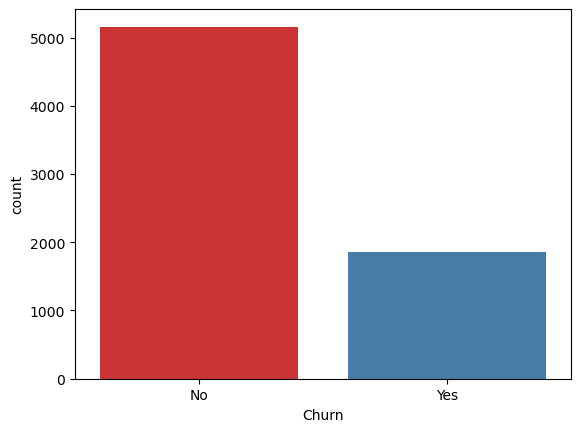

In [24]:
sns.countplot(x=df.Churn,palette='Set1')

<AxesSubplot:xlabel='gender', ylabel='count'>

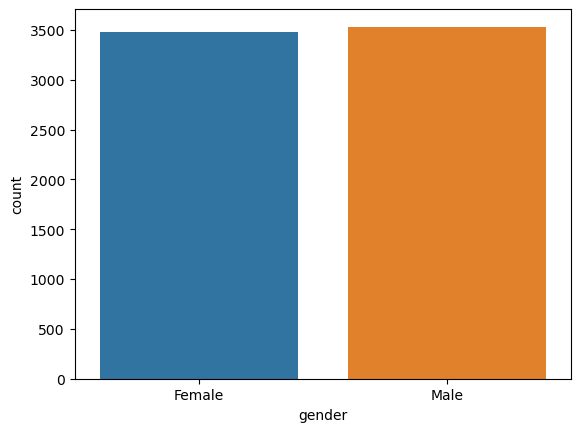

In [28]:
sns.countplot(x=df.gender)

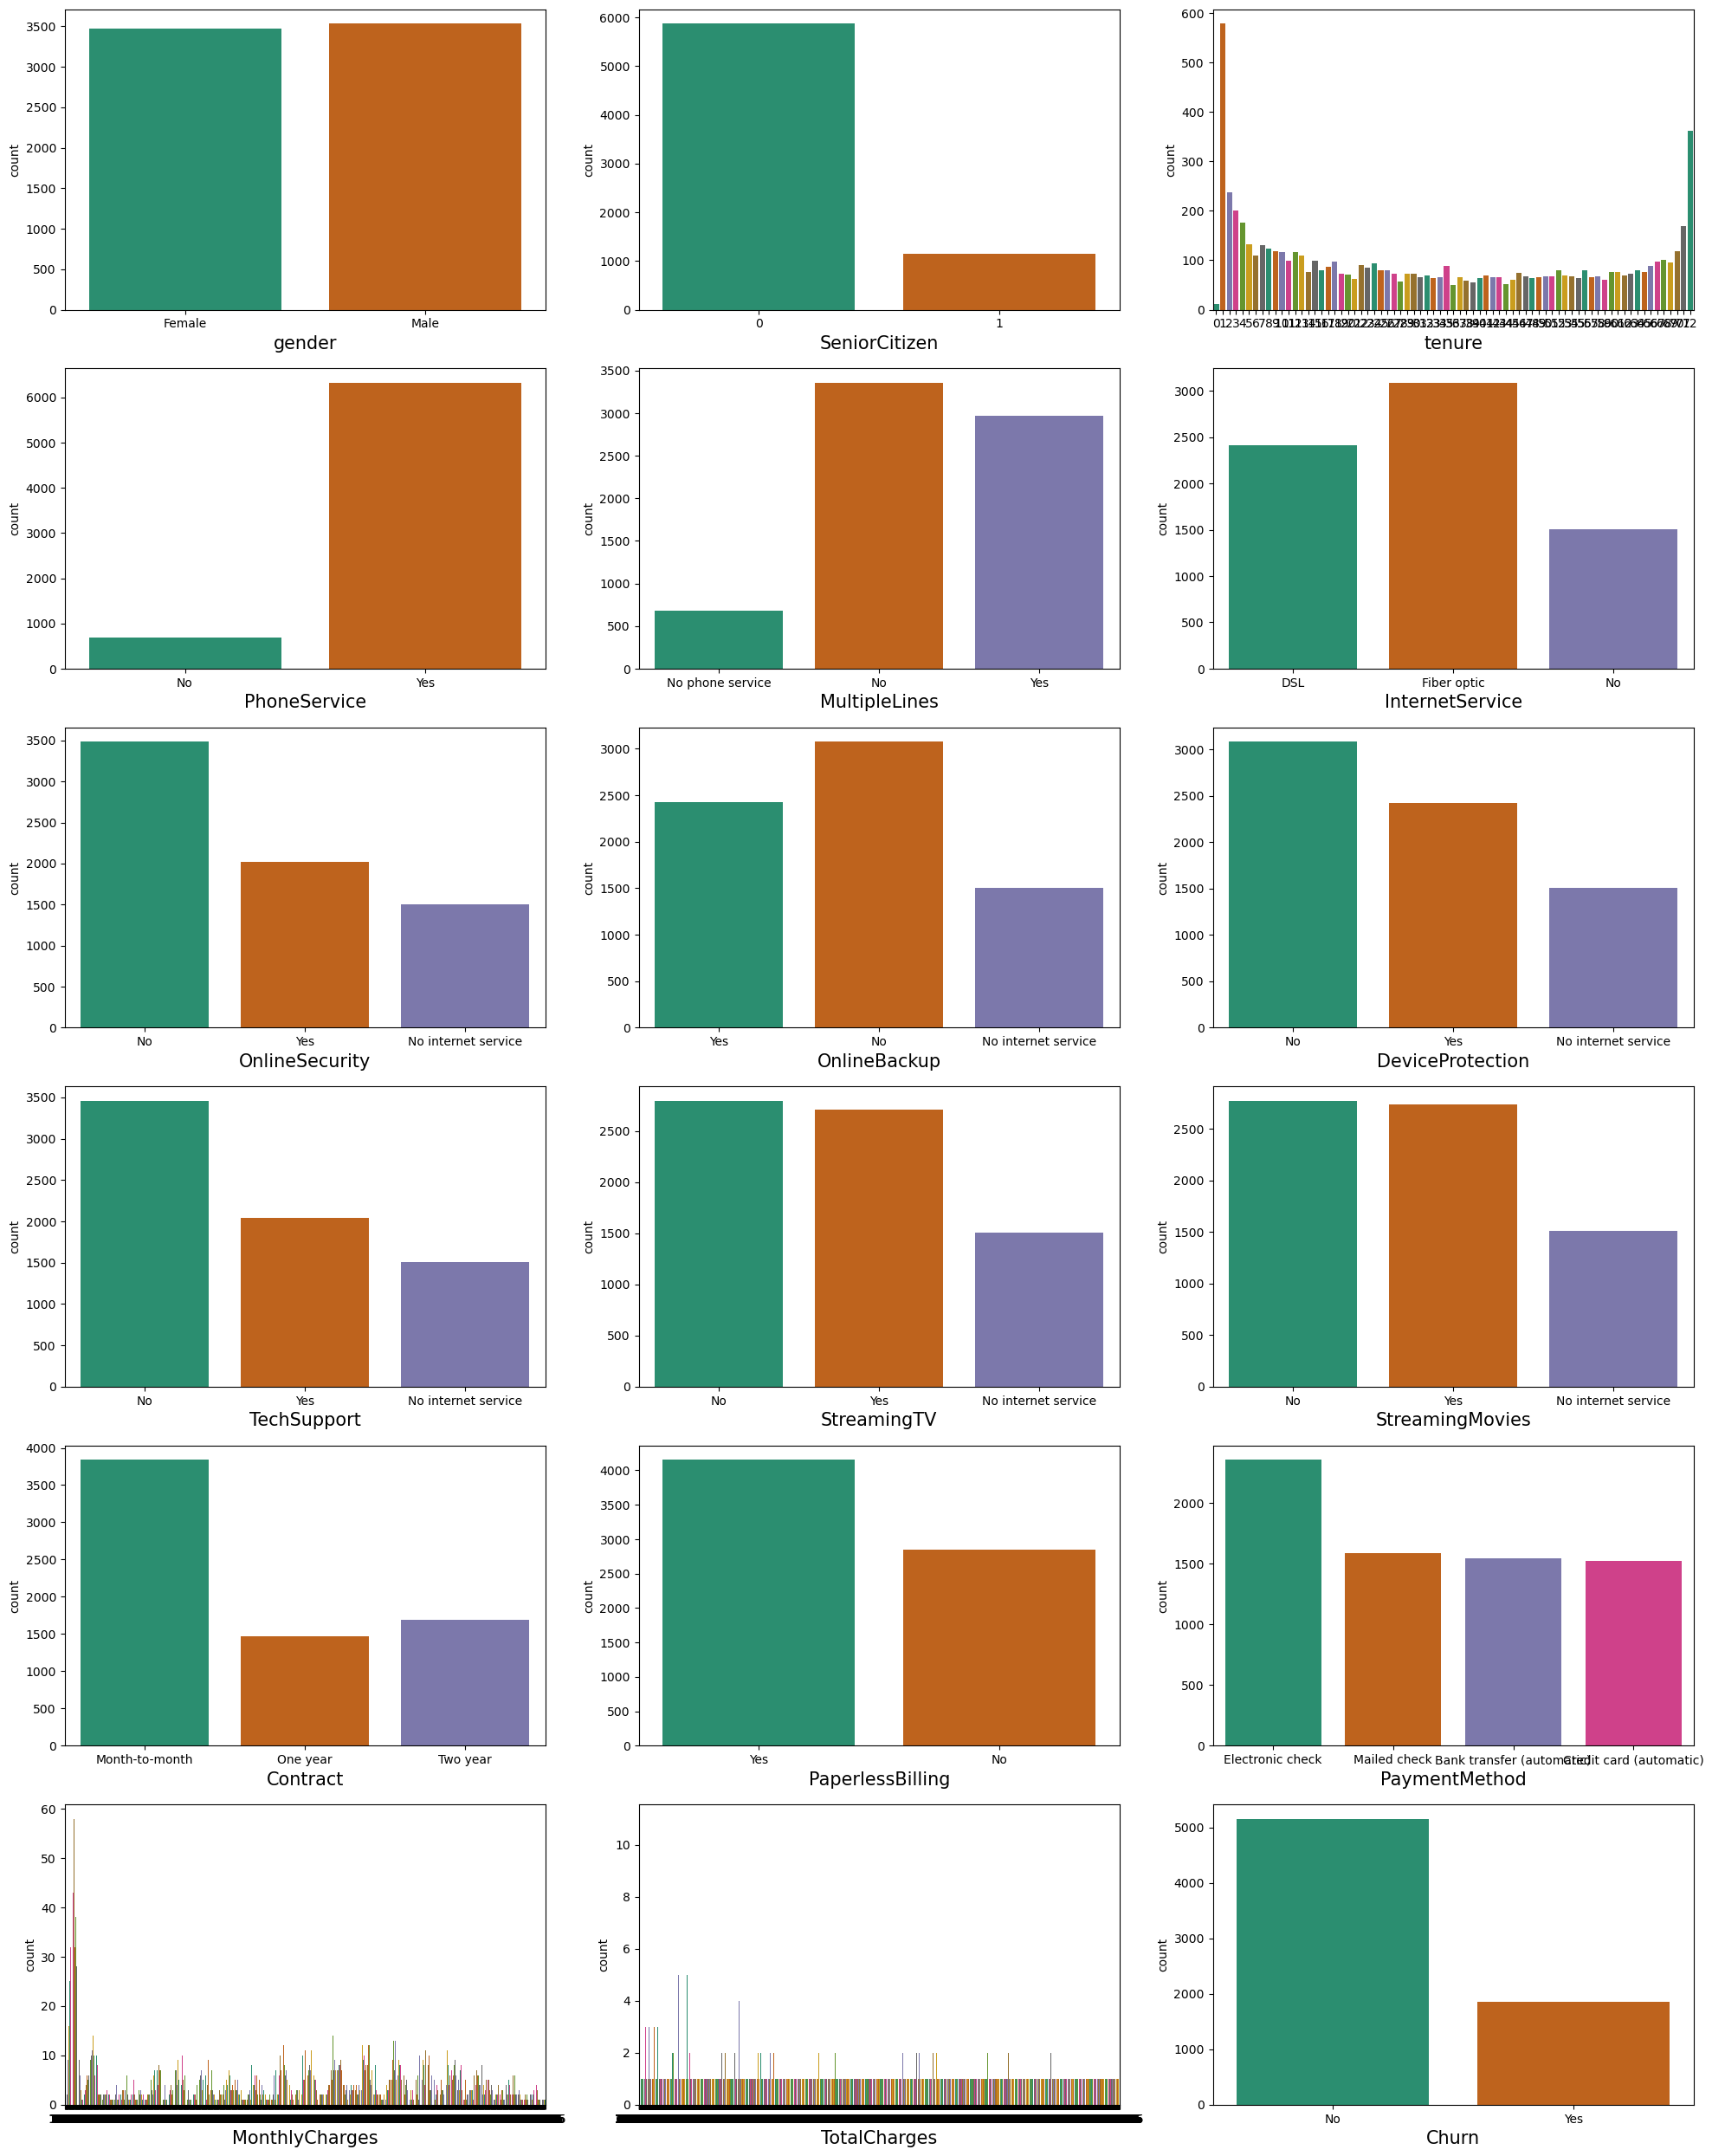

In [29]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(6,3,p)
        sns.countplot(df[i],palette='Dark2')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

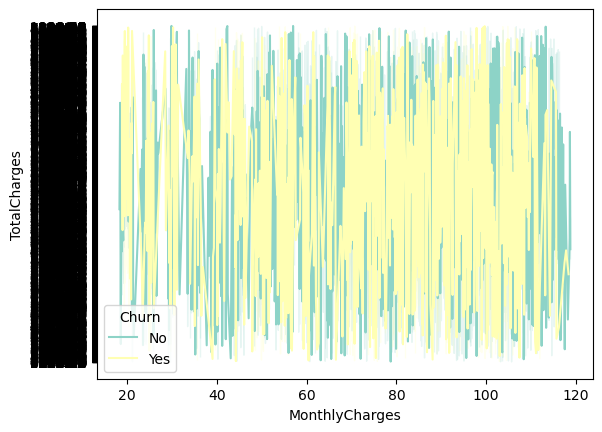

In [30]:
sns.lineplot(hue=df.Churn,x=df.MonthlyCharges,y=df.TotalCharges,palette='Set3')

([<matplotlib.patches.Wedge at 0x123a845ccd0>,
 [Text(-0.7426391068129529, 0.8114722158102887, 'Yes'),
  Text(0.7426390308374377, -0.8114722853411764, 'No')])

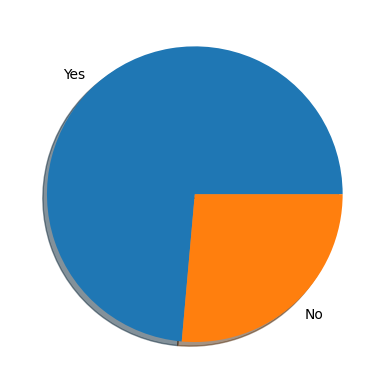

In [32]:
plt.pie(df['Churn'].value_counts(),labels=['Yes','No'],shadow=True)

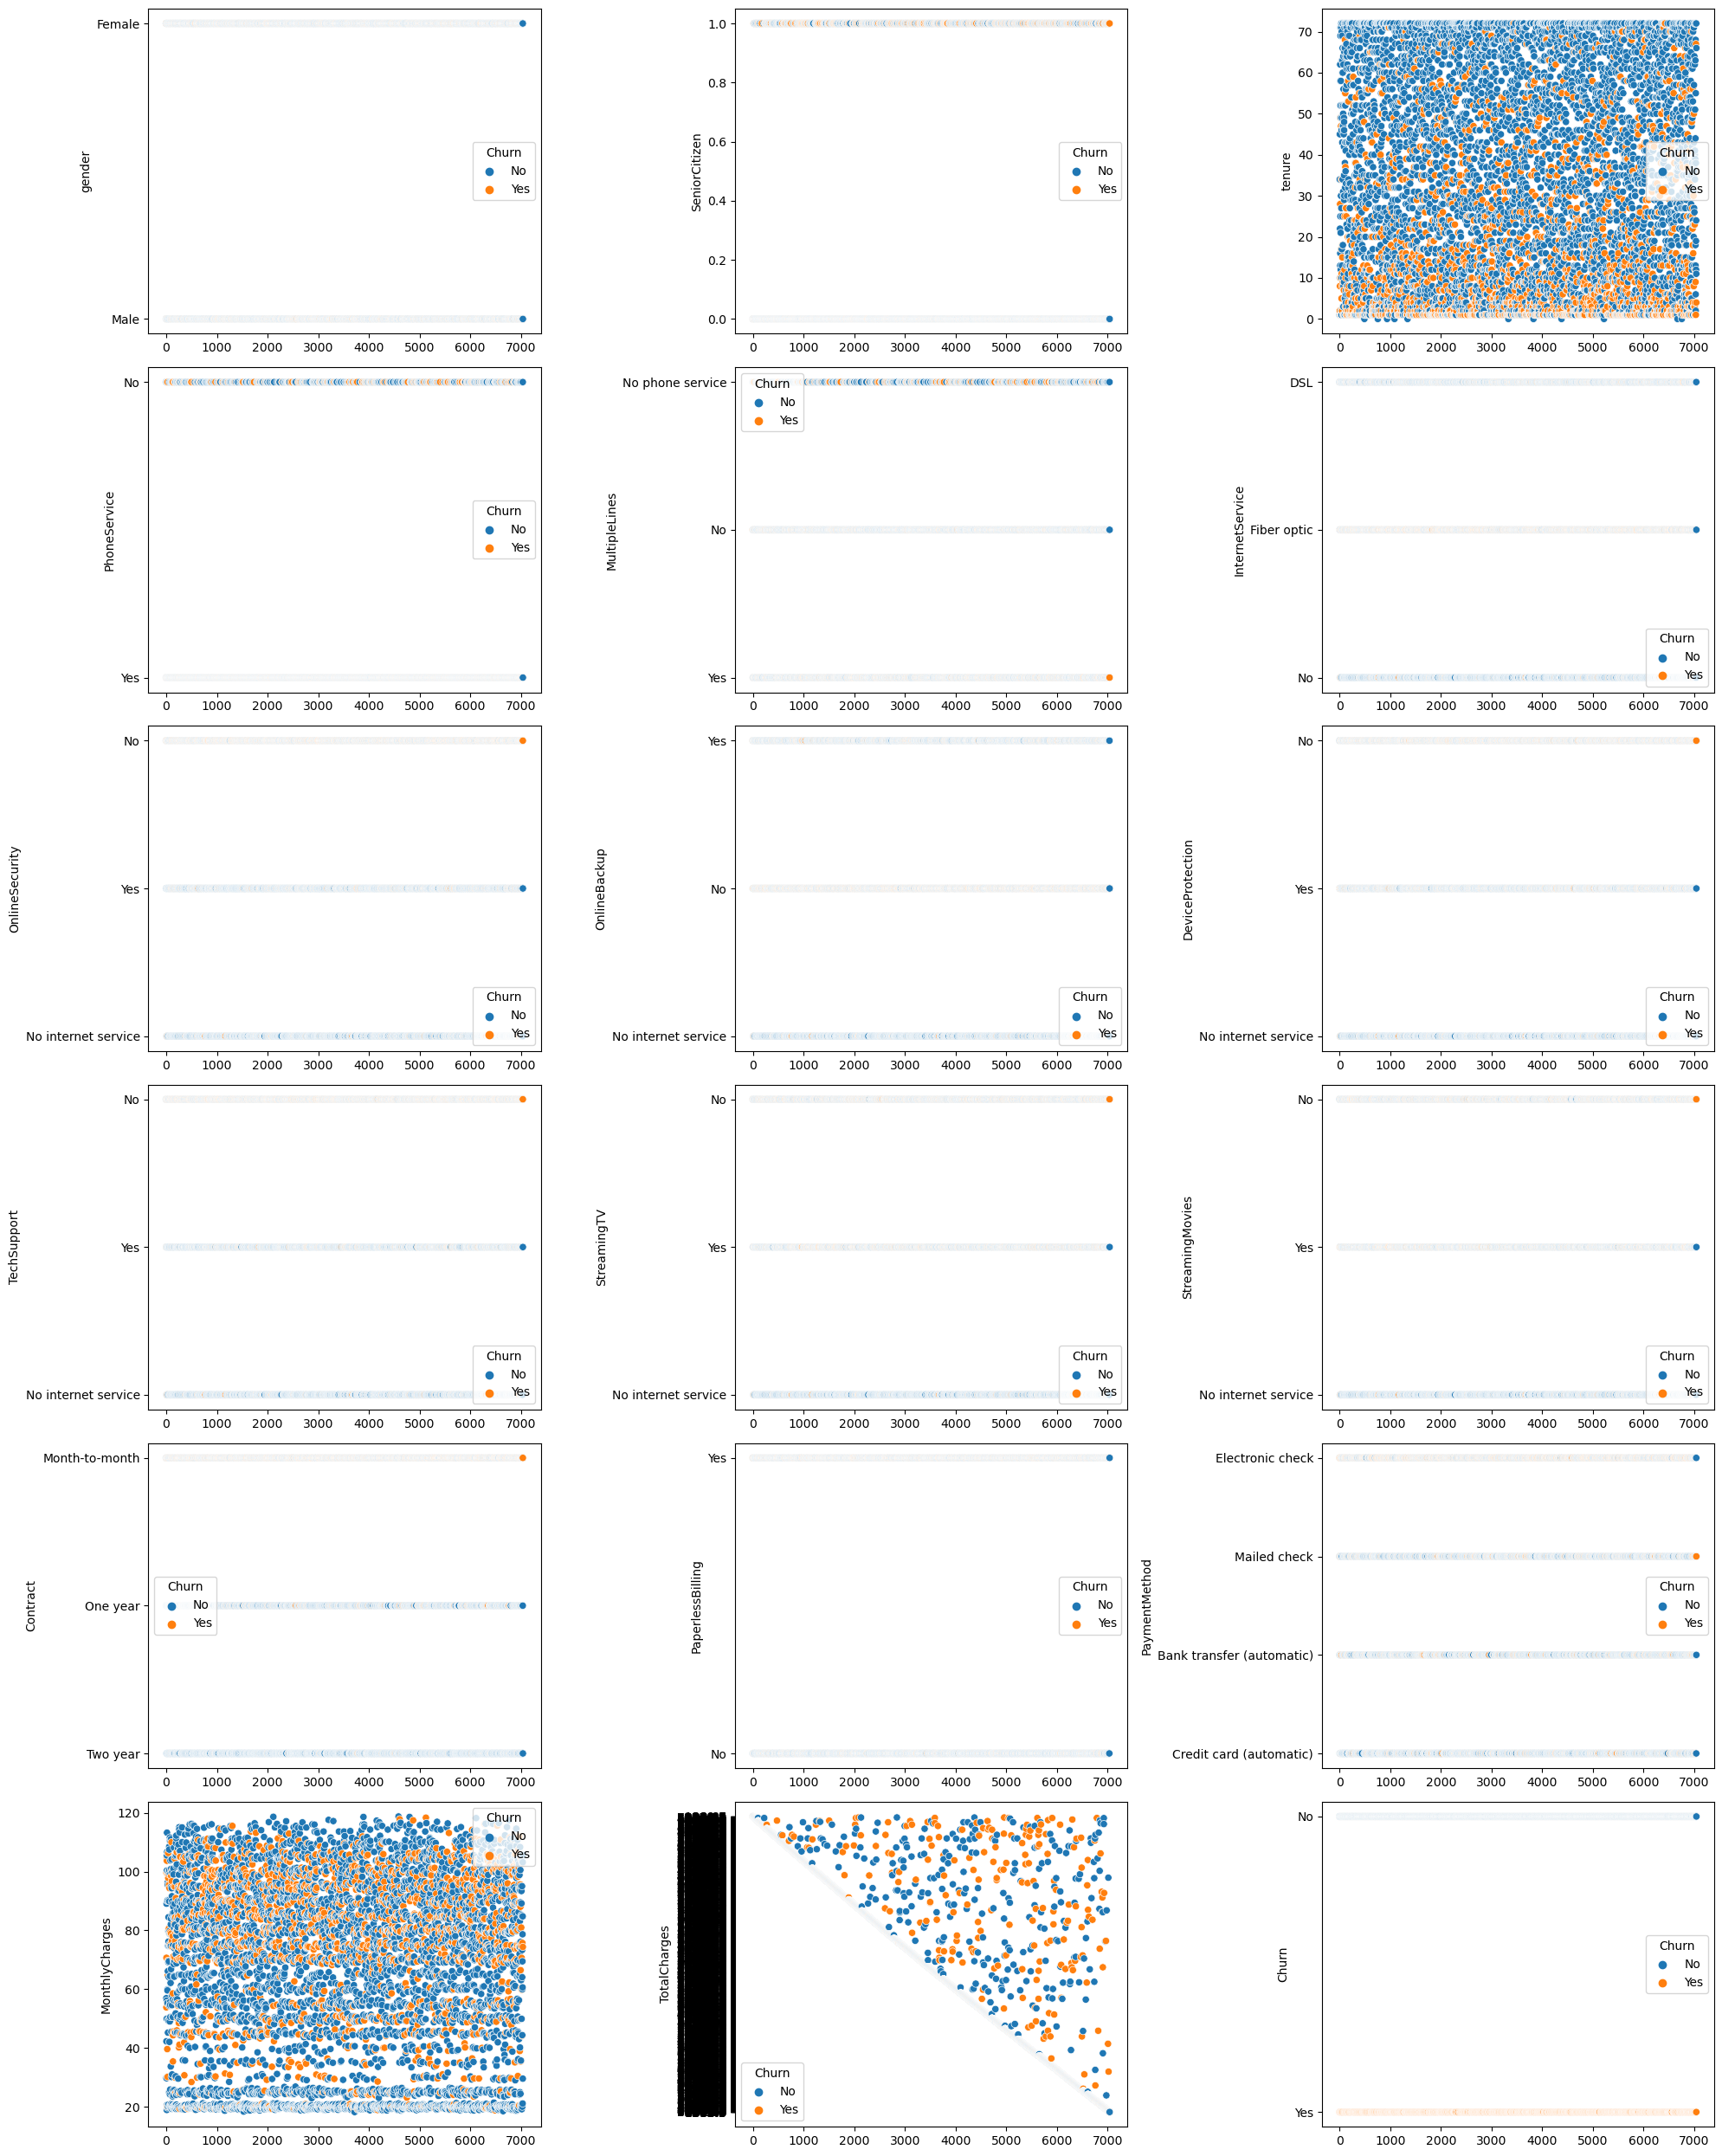

In [33]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(6,3,p)
        sns.scatterplot(x=df.index,y=df[i],hue=df['Churn'])
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='OnlineSecurity'>

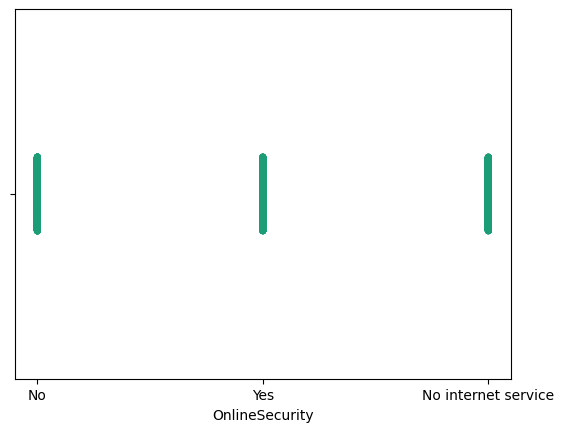

In [38]:
sns.stripplot(x=df['OnlineSecurity'],hue=df.Churn,palette='Dark2')

([<matplotlib.patches.Wedge at 0x123b23414c0>,
 [Text(0.2075527832986472, 1.0802415665697118, 'Yes'),
  Text(-0.8370945597567081, -0.7136334479448978, 'No'),
  Text(0.8587616862945731, -0.6874069872735522, 'No internet service')])

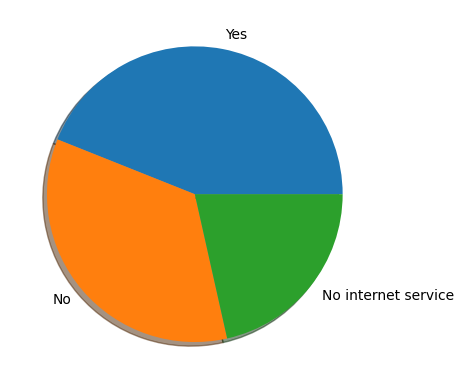

In [40]:
plt.pie(df['DeviceProtection'].value_counts(),labels=['Yes','No','No internet service'],shadow=True)

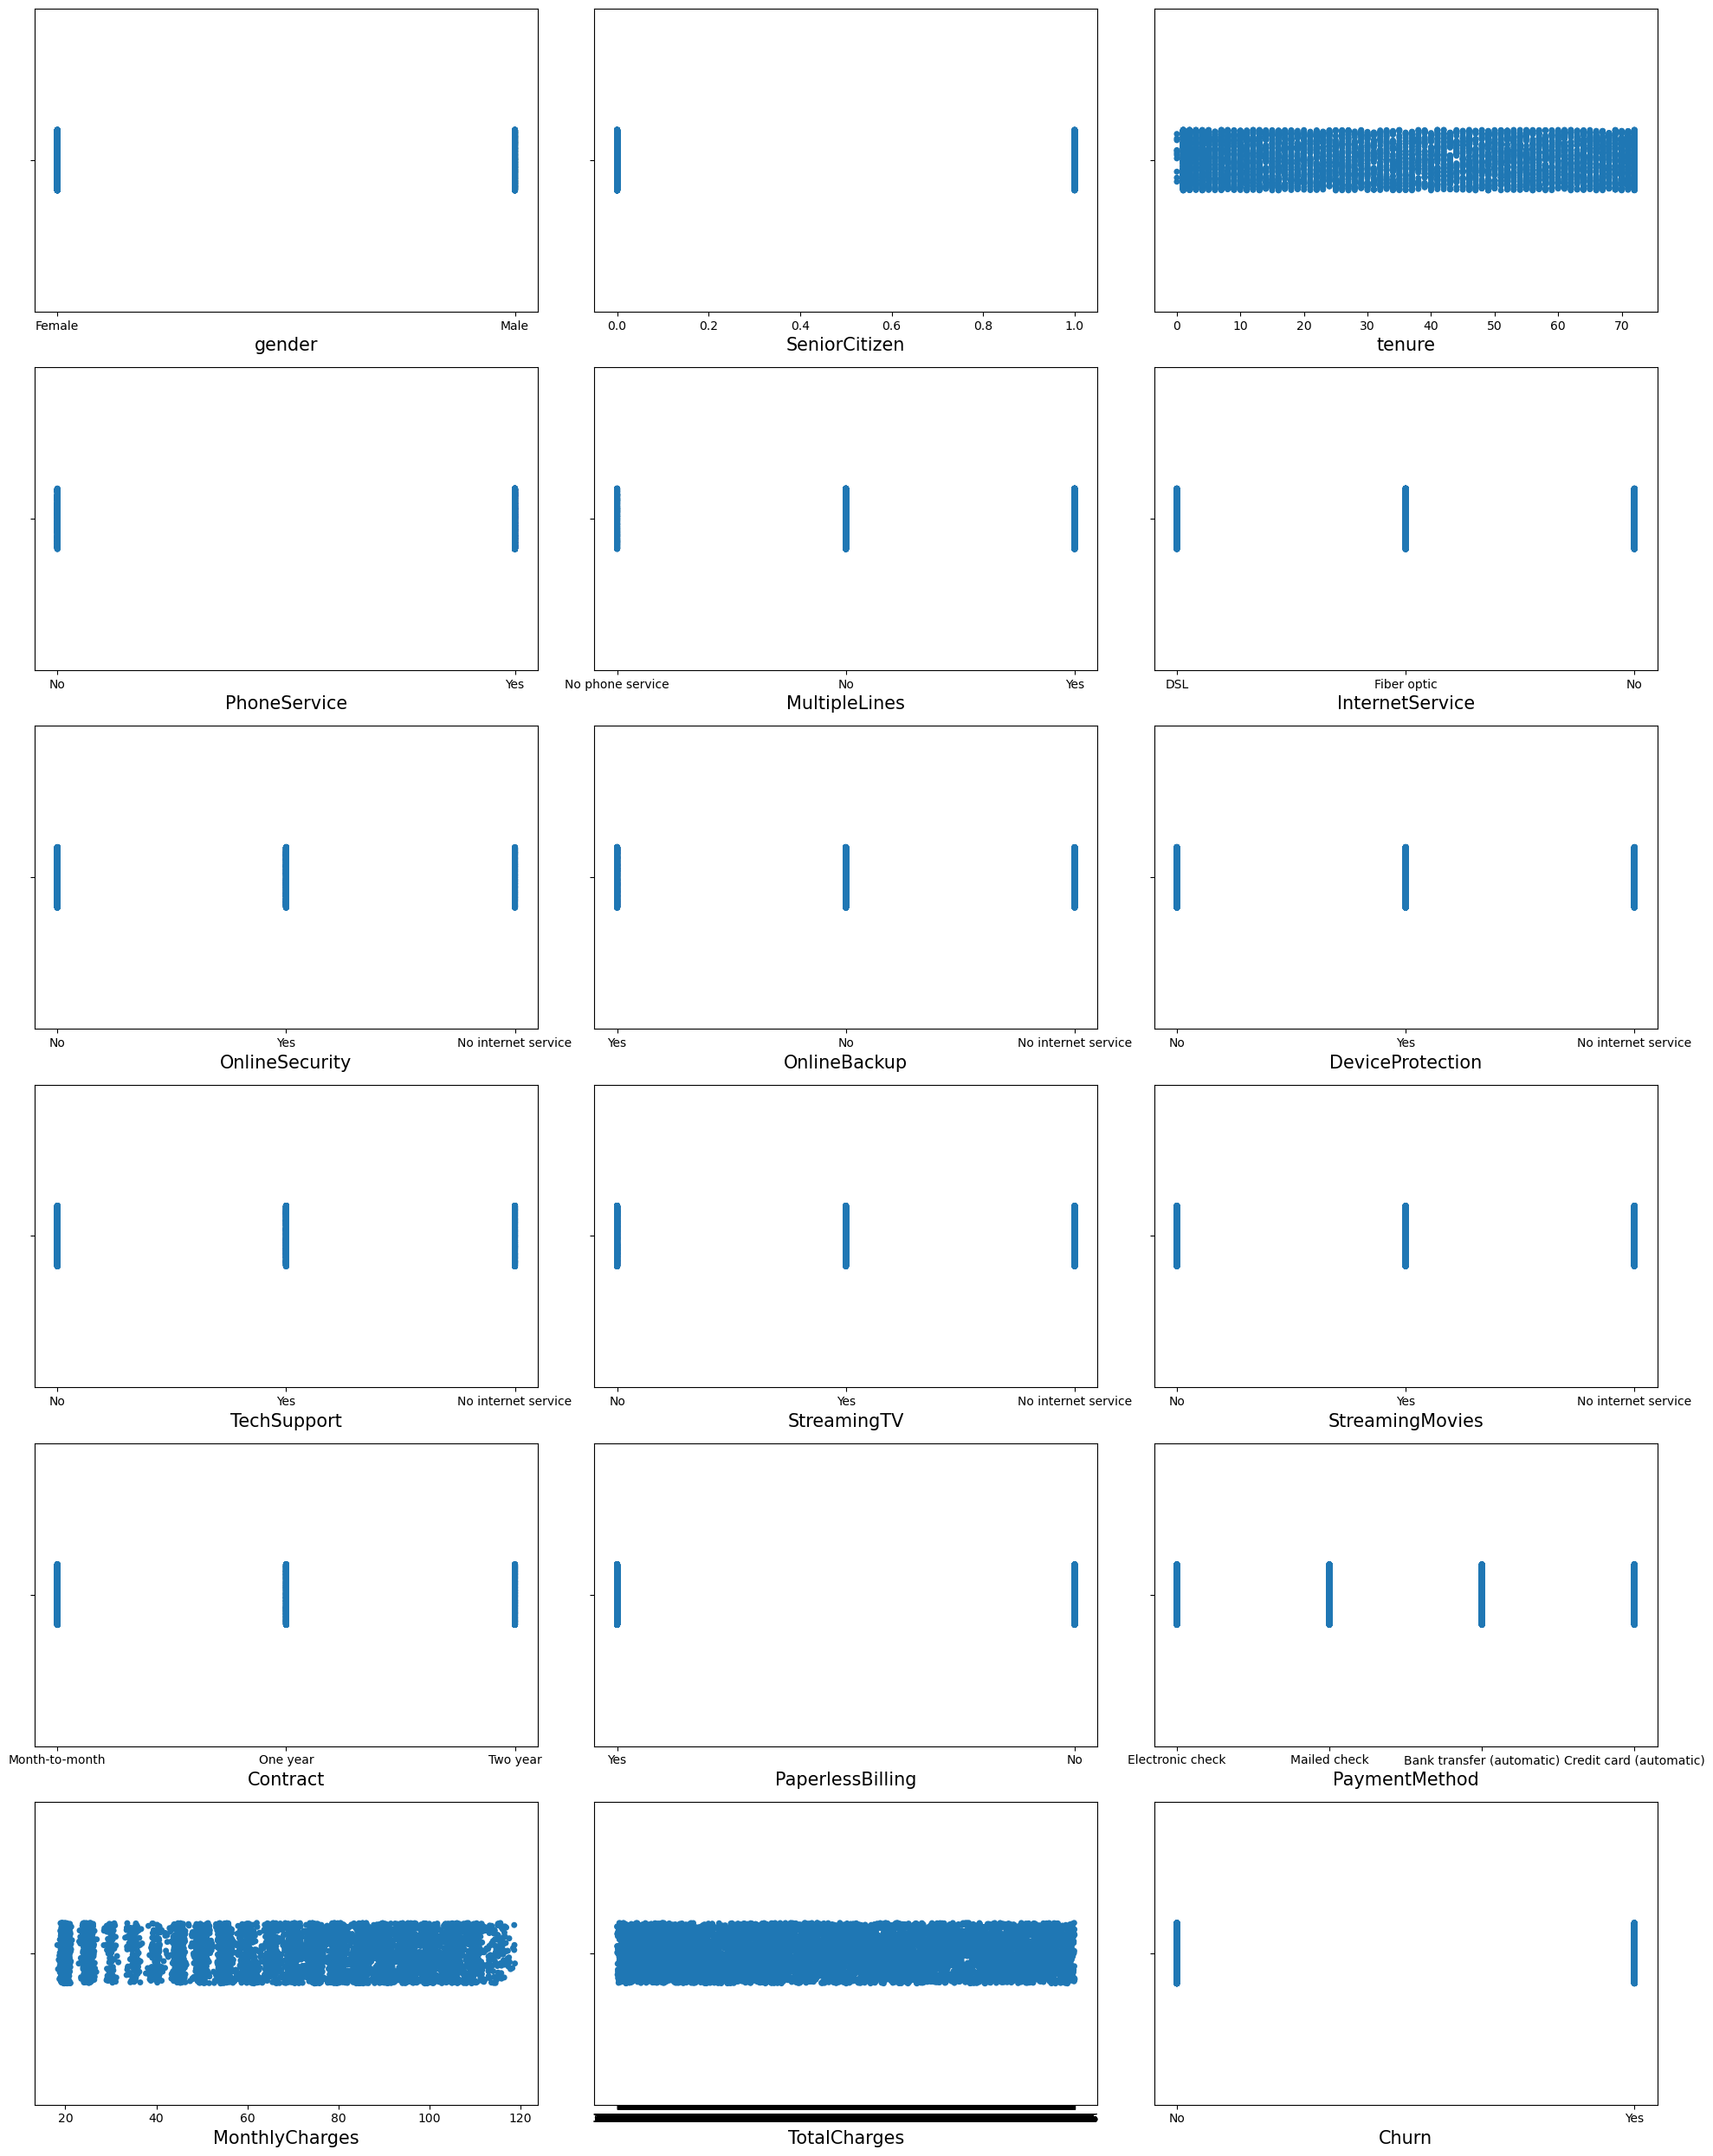

In [41]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(6,3,p)
        sns.stripplot(x=df[i],palette='tab10')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

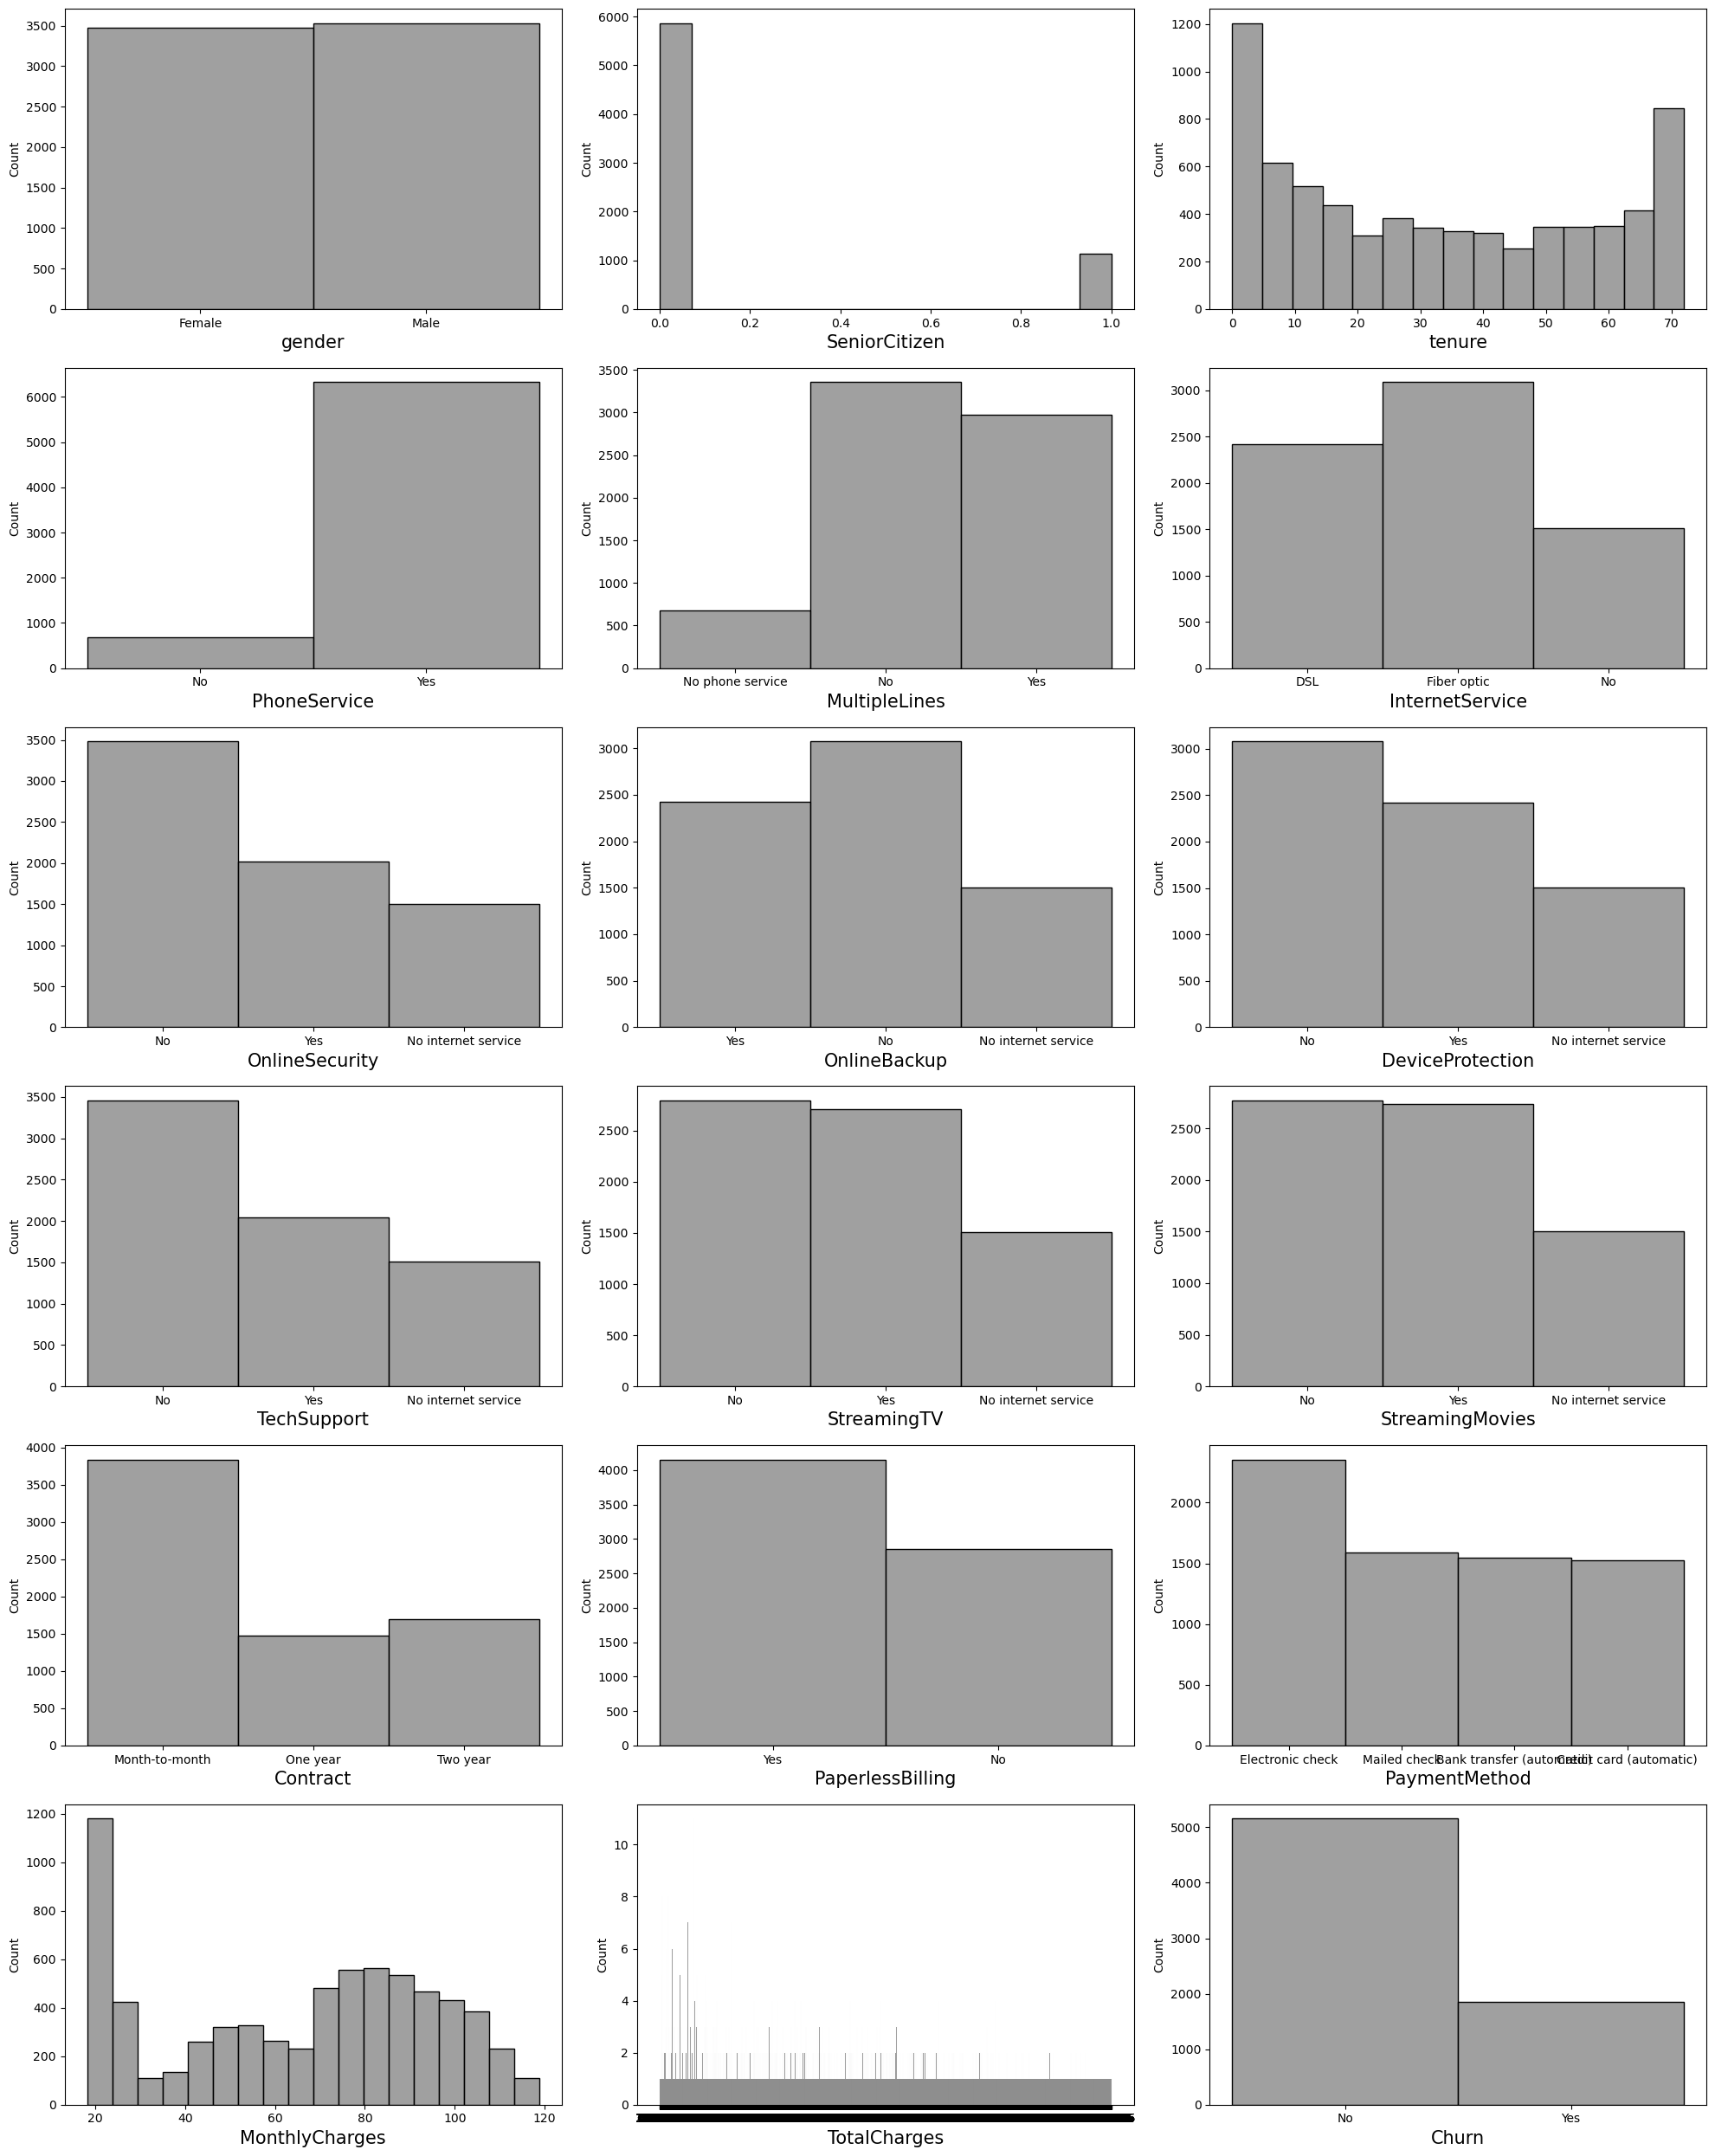

In [43]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(6,3,p)
        sns.histplot(df[i],color='gray')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

<AxesSubplot:xlabel='tenure', ylabel='Count'>

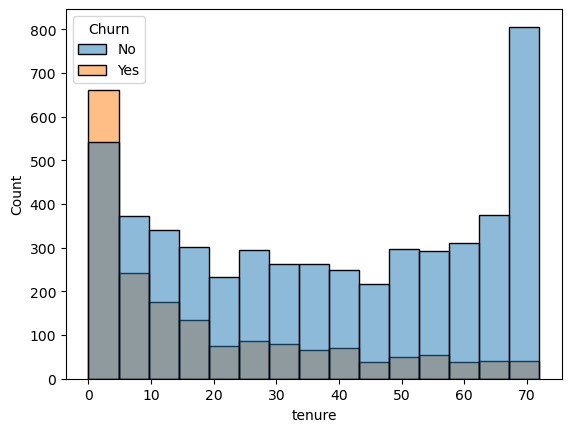

In [54]:
sns.histplot(hue=df['Churn'],x=df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

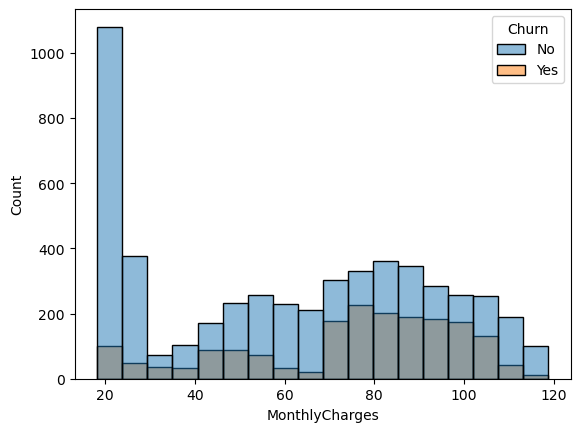

In [57]:
sns.histplot(x=df.MonthlyCharges,hue=df['Churn'])

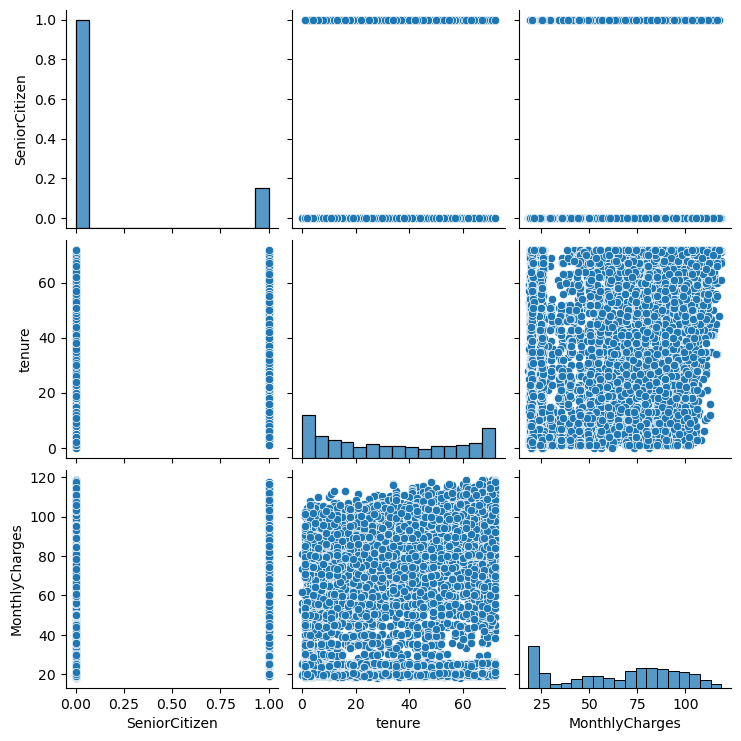

In [58]:
sns.pairplot(data=df,palette='Set1')

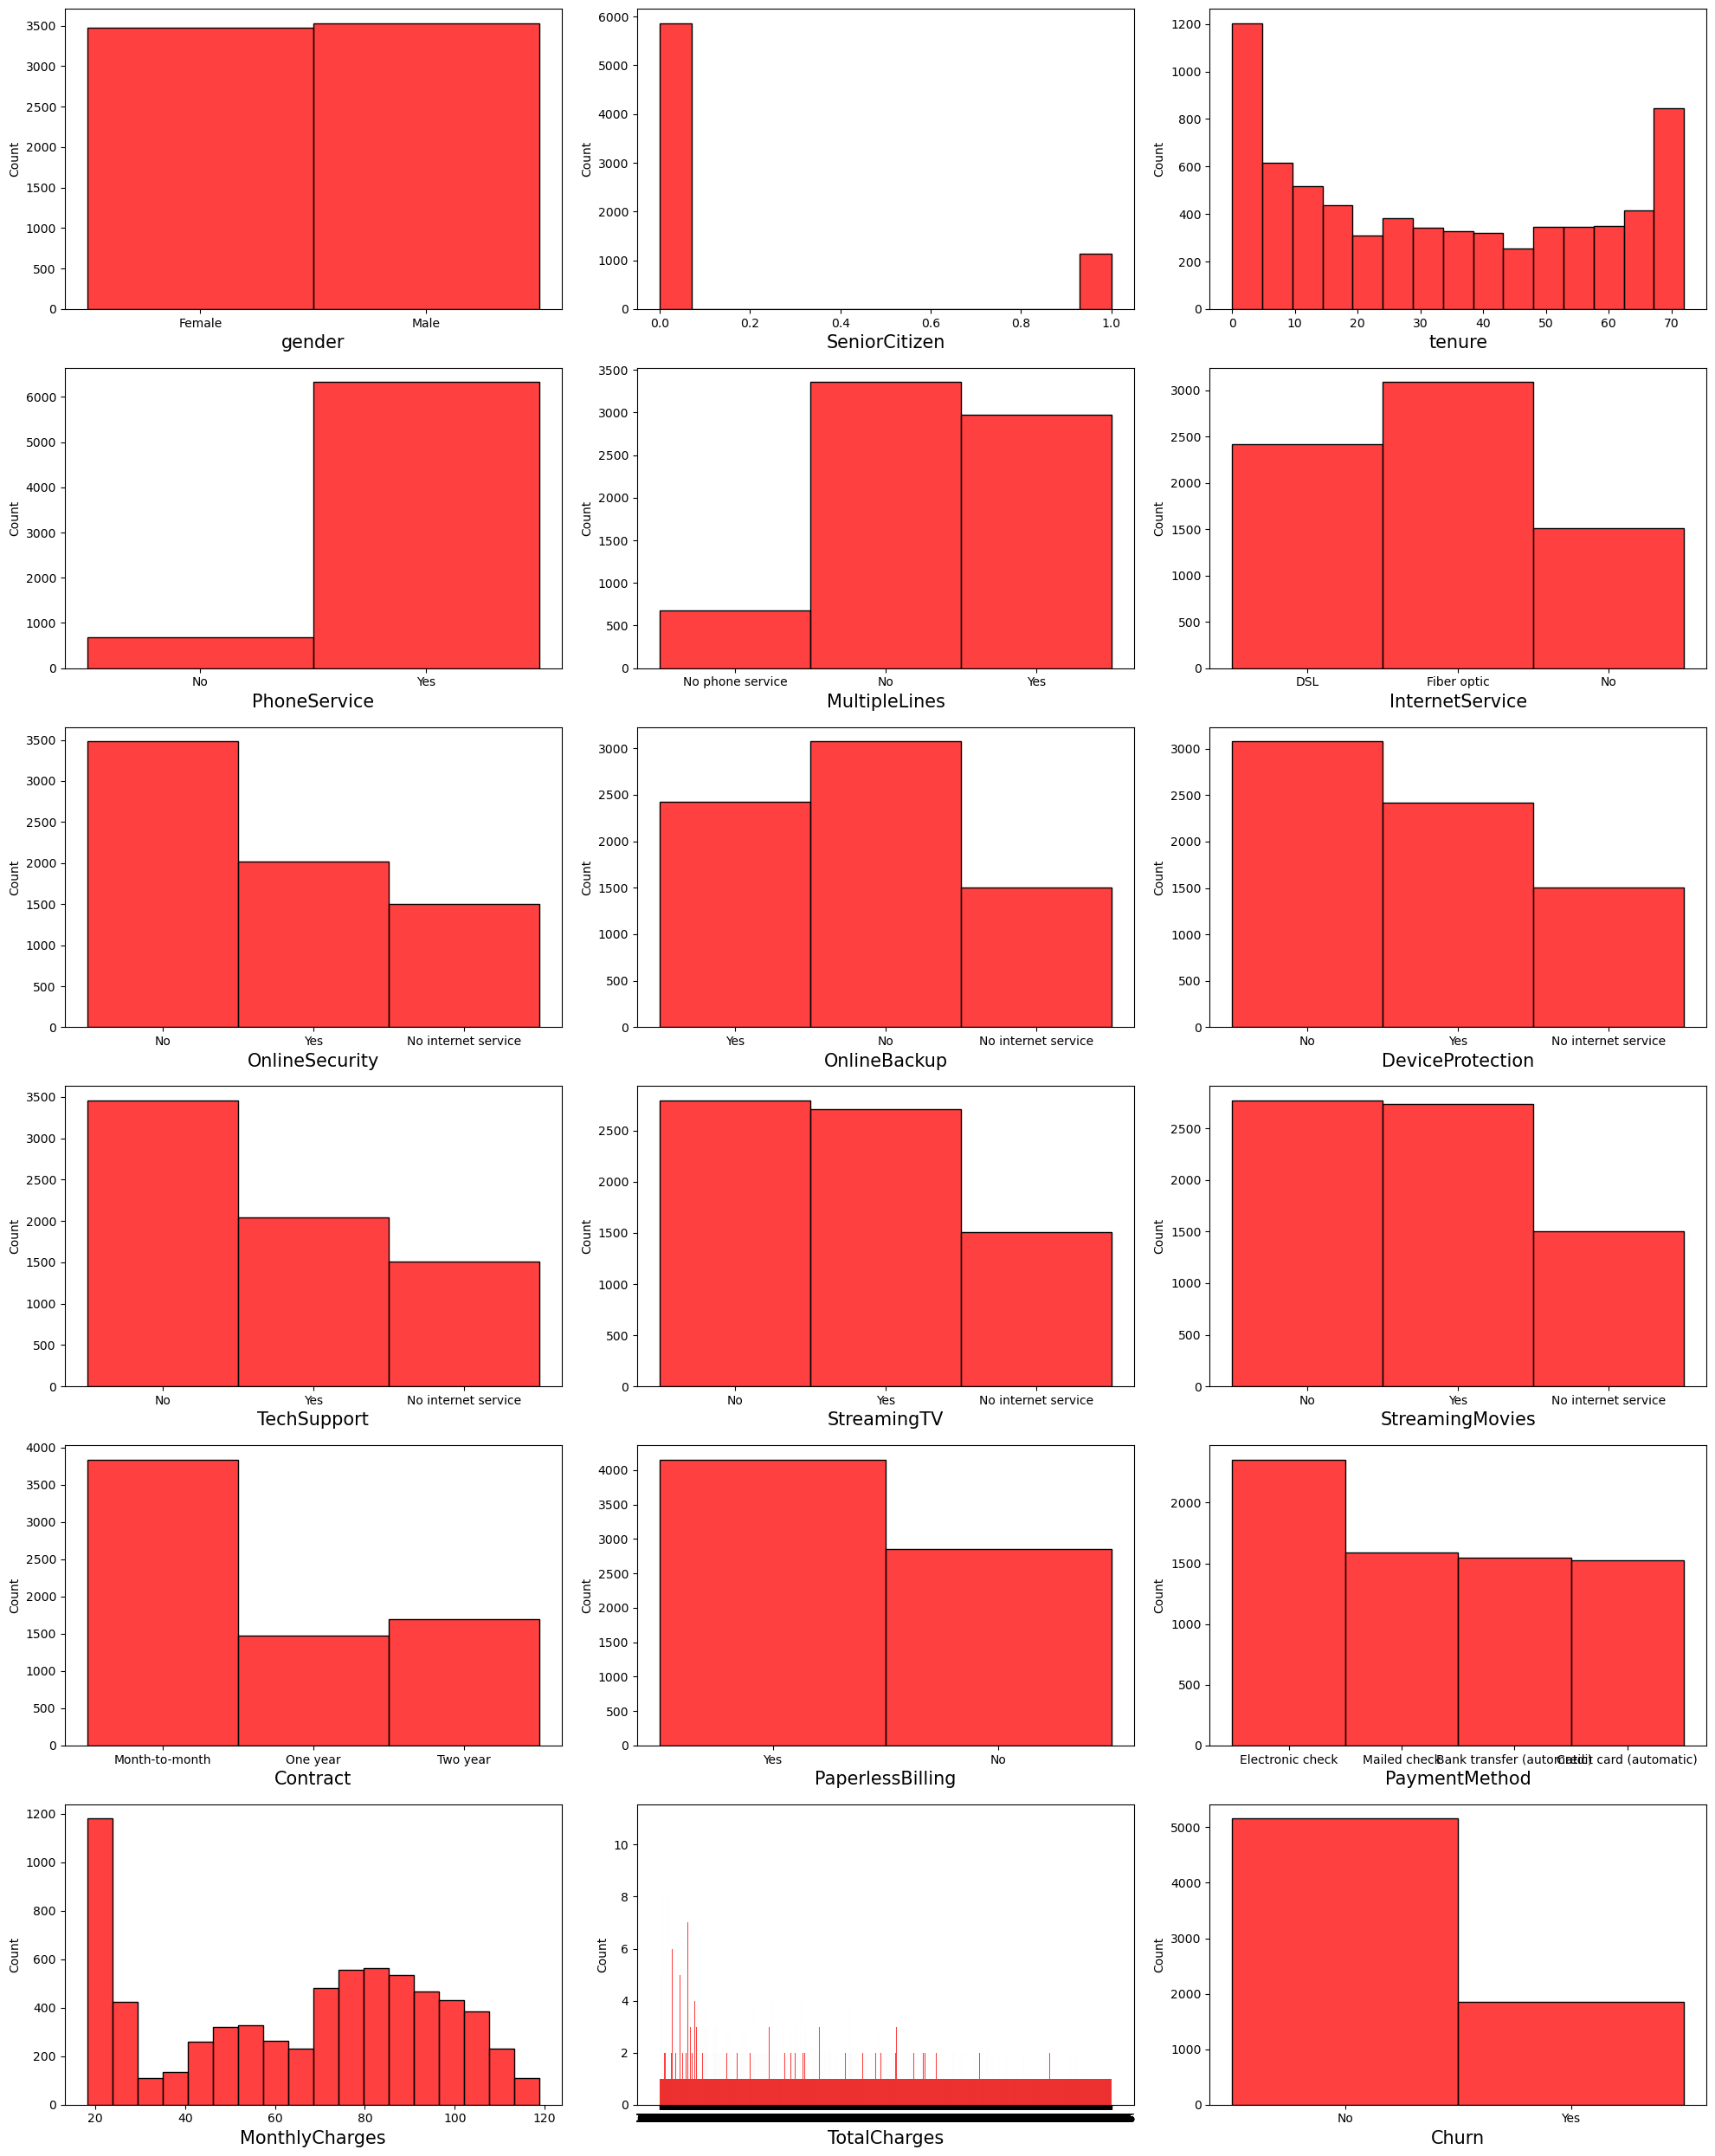

In [59]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(6,3,p)
        sns.histplot(df[i],color='red')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

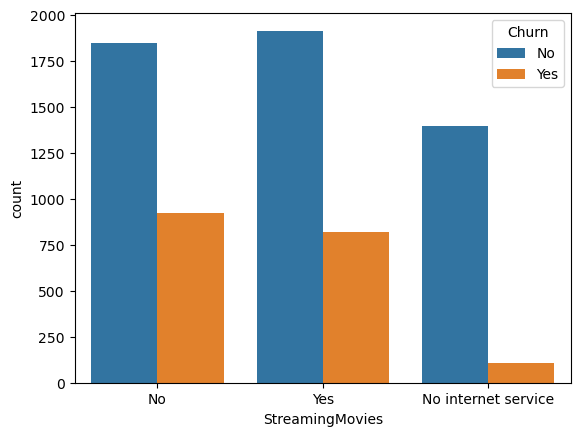

In [61]:
sns.countplot(hue=df.Churn,x=df.StreamingMovies)
plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

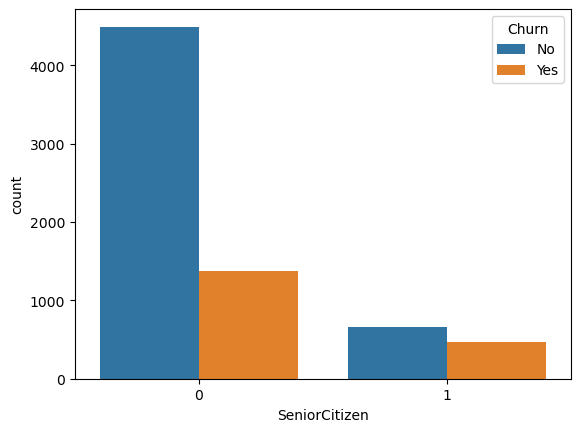

In [62]:
sns.countplot(hue=df.Churn,x=df.SeniorCitizen,palette='tab10')

<AxesSubplot:ylabel='Density'>

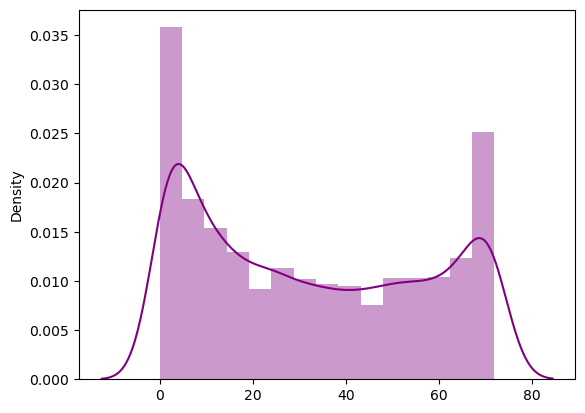

In [66]:
sns.distplot(x=df.tenure,color='purple')

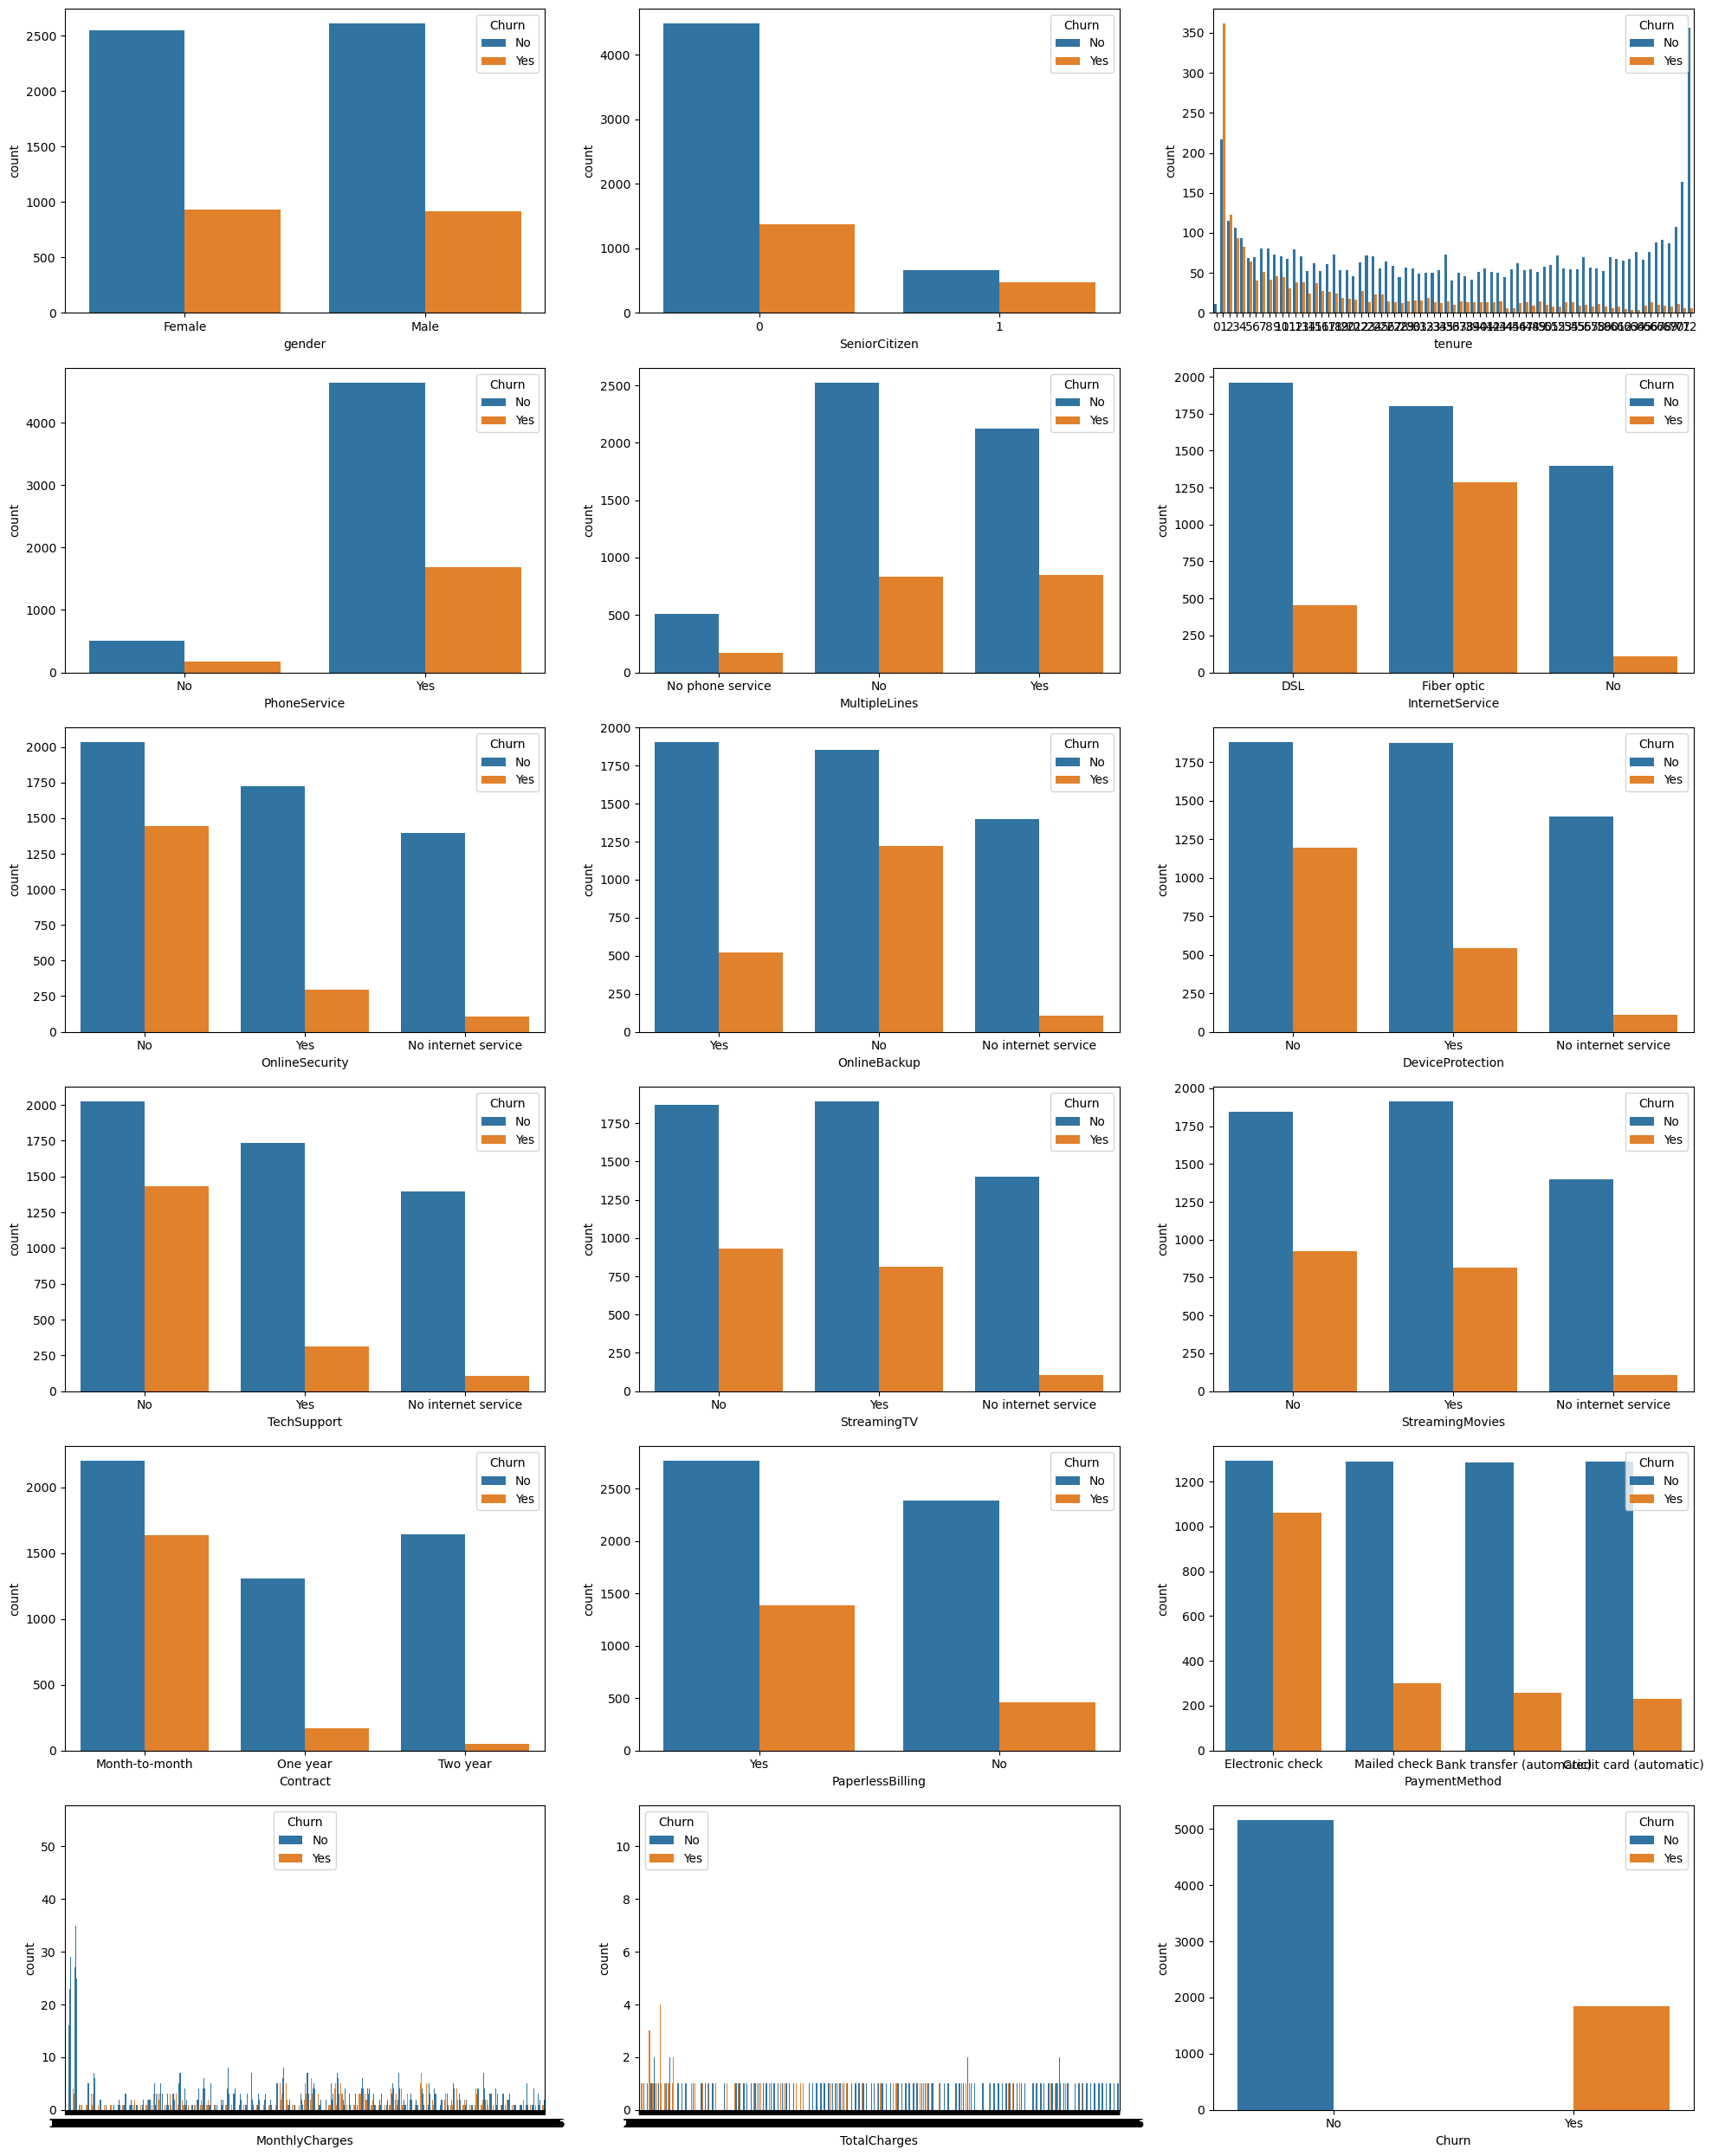

In [99]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=18:
        plt.subplot(6,3,p)
        sns.countplot(hue=df.Churn,x=df[i])
    p+=1
plt.tight_layout()

In [102]:
#Separting Cat and Num col
cat_col=[]
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    elif df.dtypes[i]!='object':
        num_col.append(i)
print("Cat_Col\n",cat_col)
print("\n")
print("Num_Col\n",num_col)

Cat_Col
 ['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Num_Col
 ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Here although 'SeniorCitizen' and 'tenure' are categorical columns, because of presence of numeric values they are behaving as numerical columns.

# Outliers

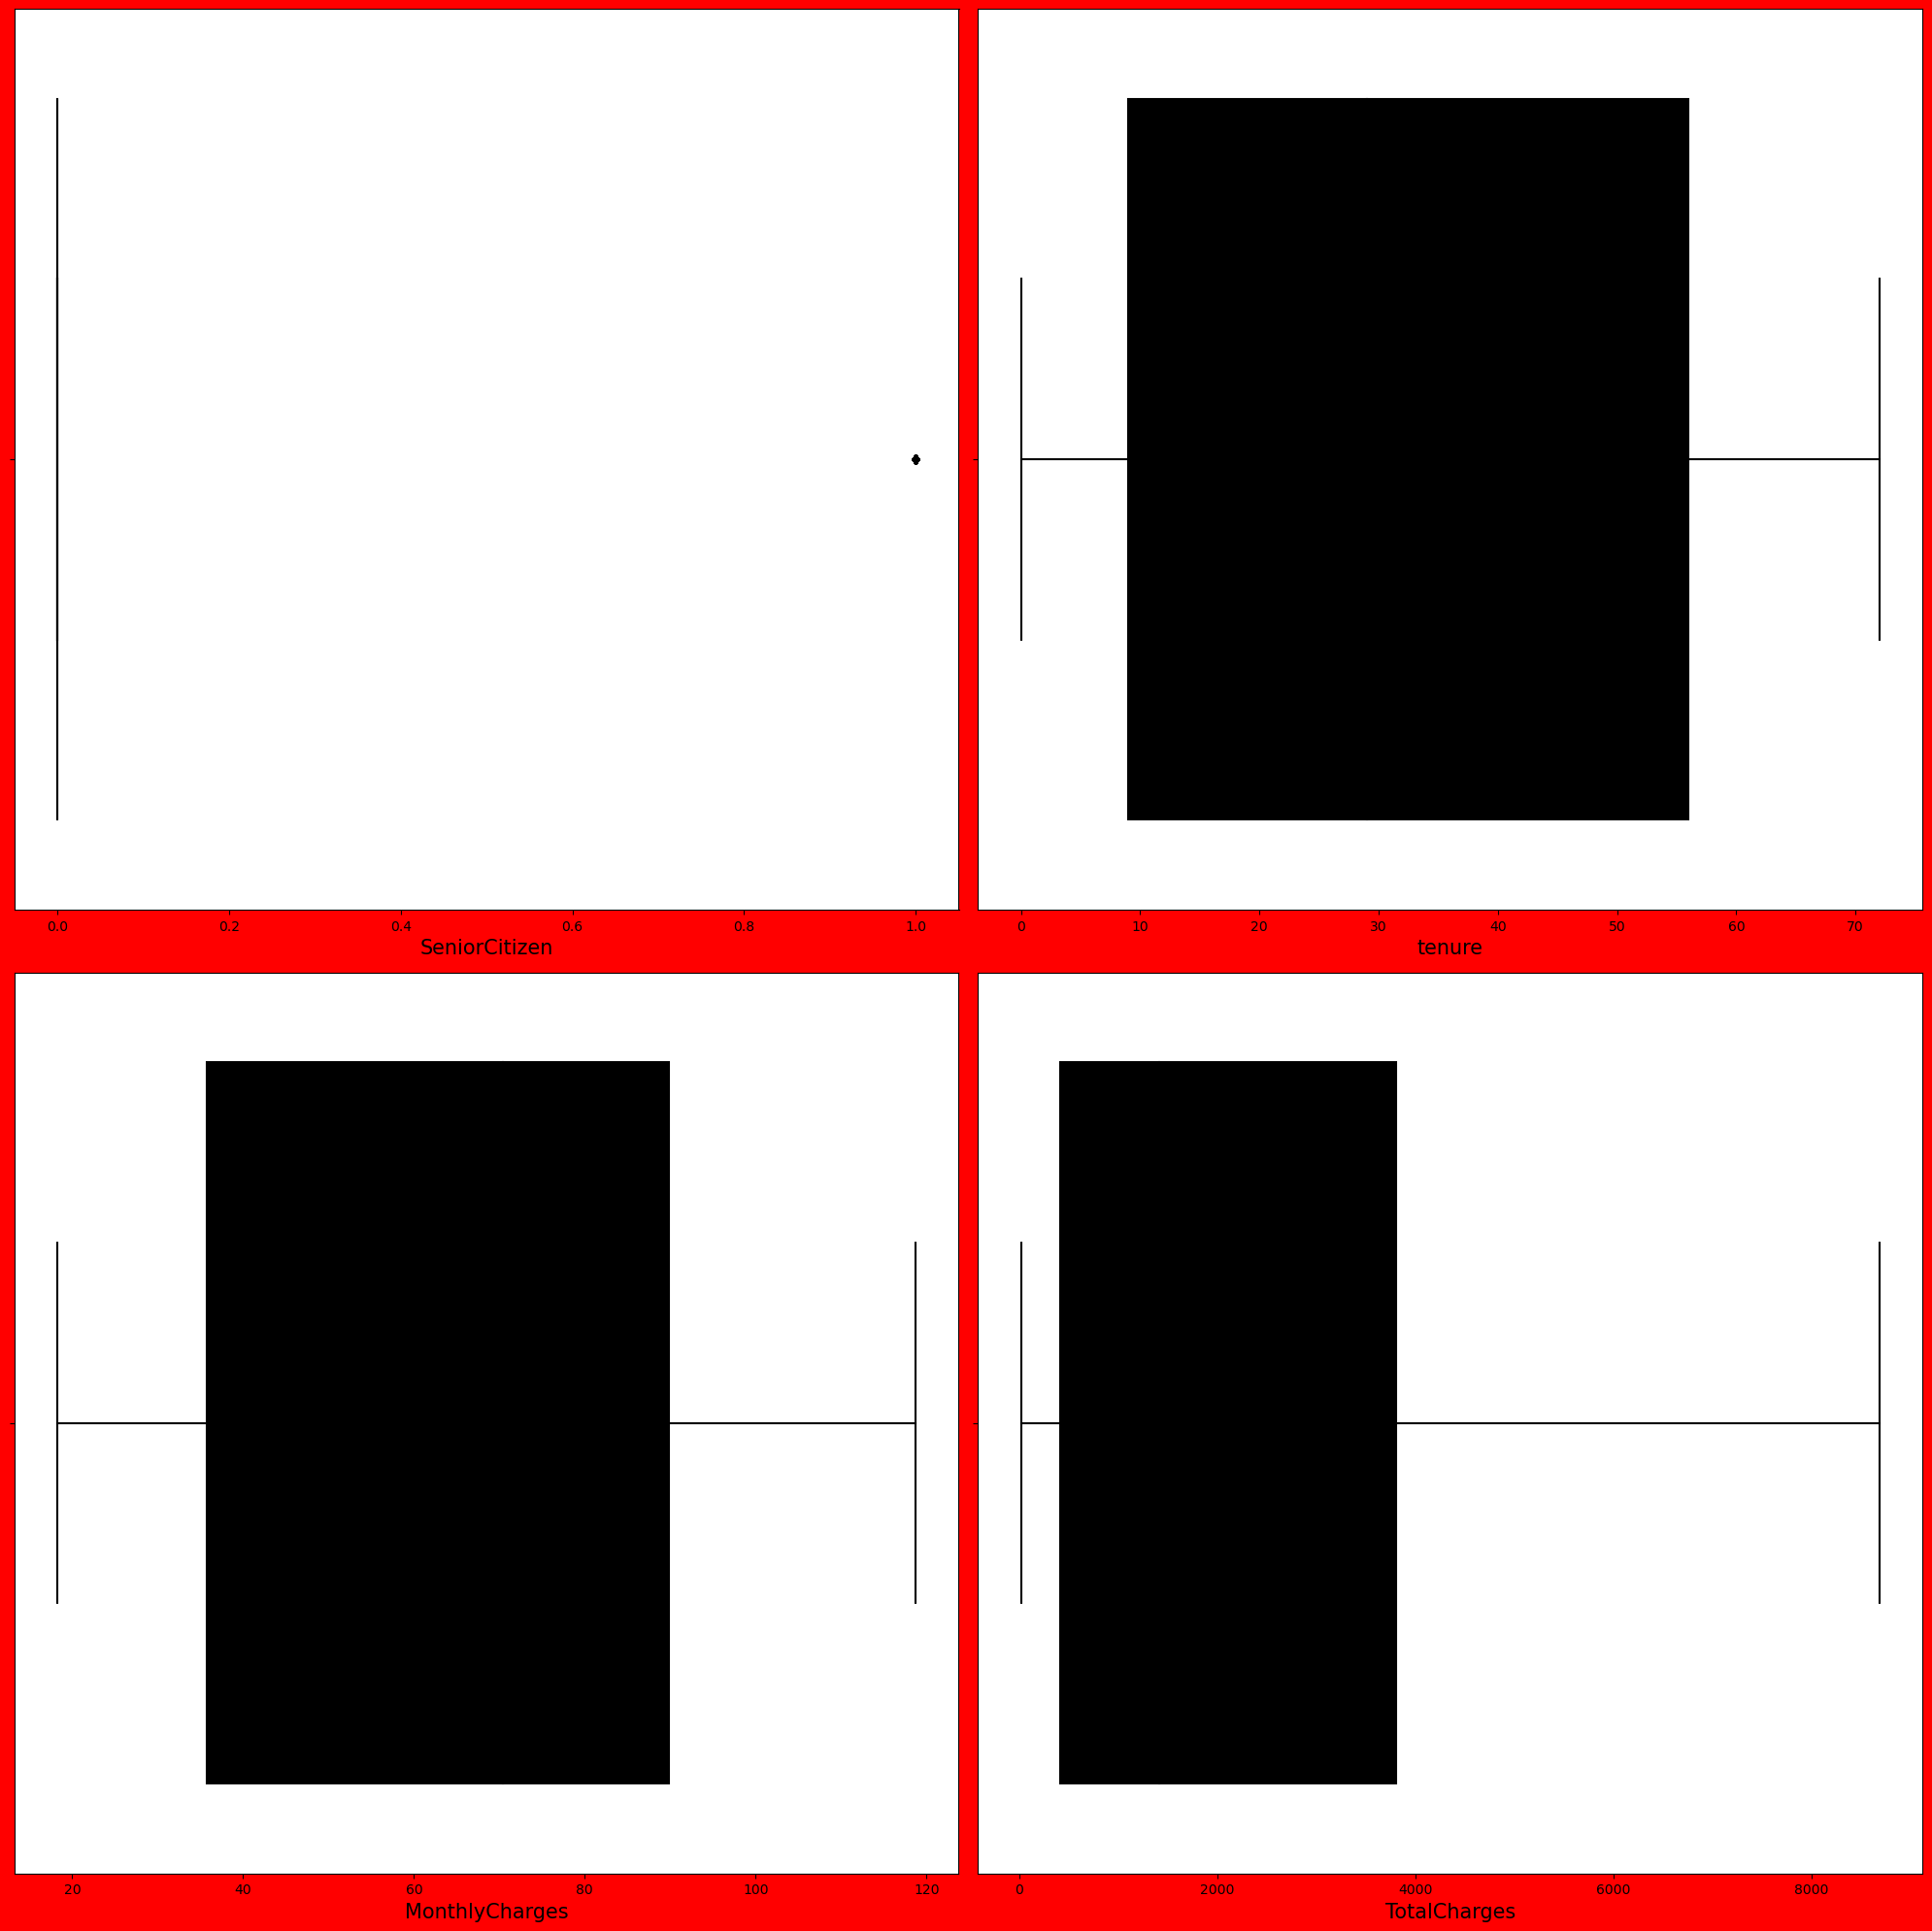

In [105]:
plt.figure(figsize=(20,20),facecolor='red')
p=1
for i in num_col:
    if p<=4:
        plt.subplot(2,2,p)
        sns.boxplot(df[i],color='black')
        plt.xlabel(i,fontsize=15)
    p+=1
plt.tight_layout()

This is a very clean dataset, it is not having any outliers.

# Skewness

In [107]:
#Checking skewness
df.skew()

SeniorCitizen     1.830059
tenure            0.233365
MonthlyCharges   -0.225973
TotalCharges      0.957258
dtype: float64

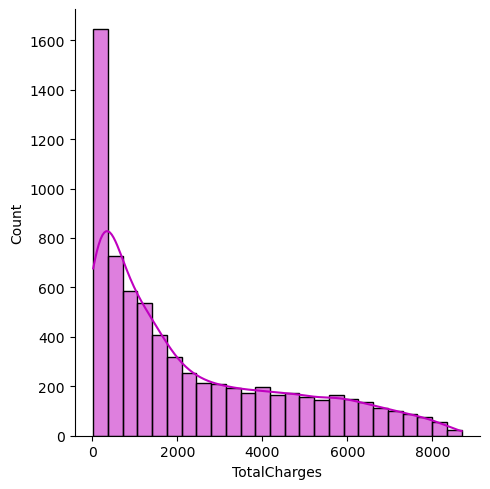

In [109]:
#Lets visualize the TotalCharges column as it showing some skewness.
sns.displot(df['TotalCharges'],color='m',kde=True)

In [110]:
#Removing skewness
from scipy.stats import boxcox
df['TotalCharges']=boxcox(df['TotalCharges'],0.5)
df.skew()

SeniorCitizen     1.830059
tenure            0.233365
MonthlyCharges   -0.225973
TotalCharges      0.305341
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

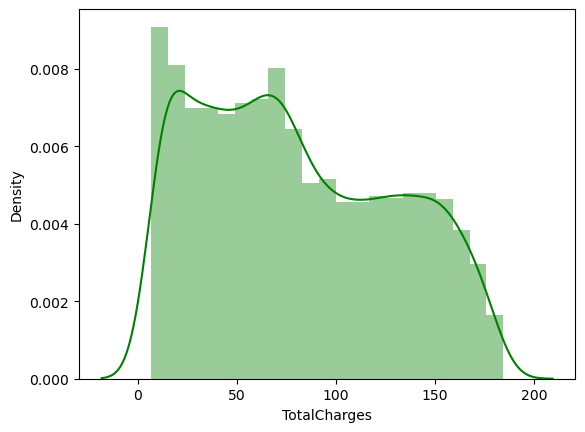

In [111]:
#Visulaizing after removing skewness
sns.distplot(df['TotalCharges'],kde=True,color='green')

# Correlation

<AxesSubplot:>

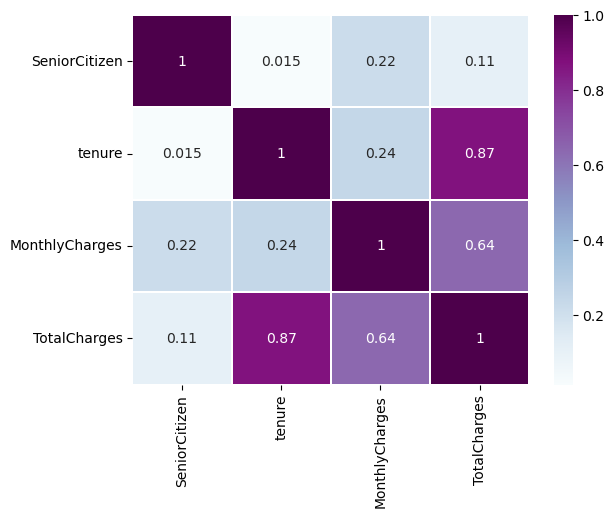

In [112]:
sns.heatmap(df.corr(),annot=True,linewidth=0.1,cmap='BuPu')

# Encoding

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
    df[i]=le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,8.927031,0
1,1,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,84.936759,0
2,1,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,18.799038,1
3,1,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,83.807925,0
4,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,22.629251,1


All data has been converted into numeric format.

In [115]:
#Separating target and feature columns
x=df.iloc[:,0:-1]
x.head()

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,8.927031
1,1,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,84.936759
2,1,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,18.799038
3,1,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,83.807925
4,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,22.629251


In [116]:
y=df.iloc[:,-1]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [117]:
#Checking the balancing of dataset
y.value_counts()

0    5158
1    1851
Name: Churn, dtype: int64

The dataset is highly imbalanced.

In [118]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)
y.value_counts()

0    5158
1    5158
Name: Churn, dtype: int64

Now the dataset is balanced.

# Multi-Collinearity

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif=pd.DataFrame()
vif["VIF_Values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF_Values,Features
0,1.750666,gender
1,1.238353,SeniorCitizen
2,33.300496,tenure
3,15.362254,PhoneService
4,2.824573,MultipleLines
5,4.505870,InternetService
6,2.086257,OnlineSecurity
7,2.264445,OnlineBackup
8,2.440416,DeviceProtection
9,2.226568,TechSupport


The two columns 'tenure','PhoneService' are having high multi-collinearity, lets drop them

In [121]:
x.drop(['tenure','PhoneService'],axis=1,inplace=True)

In [123]:
x.head()

,gender,SeniorCitizen,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,8.927031
1,1,0,0,0,2,0,2,0,0,0,1,0,3,56.95,84.936759
2,1,0,0,0,2,2,0,0,0,0,0,1,3,53.85,18.799038
3,1,0,1,0,2,0,2,2,0,0,1,0,0,42.30,83.807925
4,0,0,0,1,0,0,0,0,0,0,0,1,2,70.70,22.629251


# Modelling

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [126]:
#finding the best random state
score=0
rs=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>score:
        score=acc
        rs=i
print("Maximum accuracy at random_state",rs,"is",score,".")

Maximum accuracy at random_state 187 is 0.8044052863436123 .


In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=rs)

In [128]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,lr_pred))
print("\n")
print("Confusion Matrix=",confusion_matrix(y_test,lr_pred))
print("Classification_report =",classification_report(y_test,lr_pred))

Accuracy Score = 0.7806167400881058


Confusion Matrix= [[1288  424]
 [ 323 1370]]
Classification_report =               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1712
           1       0.76      0.81      0.79      1693

    accuracy                           0.78      3405
   macro avg       0.78      0.78      0.78      3405
weighted avg       0.78      0.78      0.78      3405



In [129]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,dtc_pred))
print("\n")
print("Confusion Matrix=",confusion_matrix(y_test,dtc_pred))
print("Classification_report =",classification_report(y_test,dtc_pred))

Accuracy Score = 0.8023494860499266


Confusion Matrix= [[1361  351]
 [ 322 1371]]
Classification_report =               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1712
           1       0.80      0.81      0.80      1693

    accuracy                           0.80      3405
   macro avg       0.80      0.80      0.80      3405
weighted avg       0.80      0.80      0.80      3405



In [131]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,rfc_pred))
print("\n")
print("Confusion Matrix=",confusion_matrix(y_test,rfc_pred))
print("Classification_report =",classification_report(y_test,rfc_pred))

Accuracy Score = 0.8431718061674008


Confusion Matrix= [[1440  272]
 [ 262 1431]]
Classification_report =               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1712
           1       0.84      0.85      0.84      1693

    accuracy                           0.84      3405
   macro avg       0.84      0.84      0.84      3405
weighted avg       0.84      0.84      0.84      3405



In [132]:
sv=SVC()
sv.fit(x_train,y_train)
sv_pred=sv.predict(x_test)
print("Accuracy Score =",accuracy_score(y_test,sv_pred))
print("\n")
print("Confusion Matrix=",confusion_matrix(y_test,sv_pred))
print("Classification_report =",classification_report(y_test,sv_pred))

Accuracy Score = 0.7436123348017621


Confusion Matrix= [[1206  506]
 [ 367 1326]]
Classification_report =               precision    recall  f1-score   support

           0       0.77      0.70      0.73      1712
           1       0.72      0.78      0.75      1693

    accuracy                           0.74      3405
   macro avg       0.75      0.74      0.74      3405
weighted avg       0.75      0.74      0.74      3405



# Cross_Validation

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
#finding the best k-fold
for i in range(2,25):
    score=cross_val_score(rfc,x,y,cv=i)
    print("At k-fold",i,"the cv score is",score.mean())
    print("\n")

At k-fold 2 the cv score is 0.8166925164792556


At k-fold 3 the cv score is 0.8252287309056824


At k-fold 4 the cv score is 0.8324932144241954


At k-fold 5 the cv score is 0.8387051576878708


At k-fold 6 the cv score is 0.8396844320882431


At k-fold 7 the cv score is 0.8410347290184357


At k-fold 8 the cv score is 0.8417210174343431


At k-fold 9 the cv score is 0.8422038826531311


At k-fold 10 the cv score is 0.8436615124925751


At k-fold 11 the cv score is 0.8417130345721116


At k-fold 12 the cv score is 0.8439525408127353


At k-fold 13 the cv score is 0.8443480581028584


At k-fold 14 the cv score is 0.8453962893044659


At k-fold 15 the cv score is 0.8441475407061373


At k-fold 16 the cv score is 0.8458915631469979


At k-fold 17 the cv score is 0.8480189864126446


At k-fold 18 the cv score is 0.8493757681281626


At k-fold 19 the cv score is 0.8483948142767266


At k-fold 20 the cv score is 0.848896854067886


At k-fold 21 the cv score is 0.85007900631814


At k-fold 2

In [136]:
dtc_score=cross_val_score(dtc,x,y,cv=21)
print(dtc_score)
print(dtc_score.mean())
print("The difference between accuracy and cv score =",(accuracy_score(y_test,dtc_pred))-(dtc_score.mean()))

[0.73170732 0.70528455 0.71138211 0.73780488 0.70121951 0.71690428
 0.72301426 0.78004073 0.86354379 0.82484725 0.82077393 0.84521385
 0.83910387 0.84114053 0.81059063 0.82688391 0.84928717 0.82892057
 0.84114053 0.84928717 0.85743381]
0.795501173661722
The difference between accuracy and cv score = 0.006848312388204603


In [138]:
rfc_score=cross_val_score(rfc,x,y,cv=21)
print(rfc_score)
print(rfc_score.mean())
print("The difference between accuracy and cv score =",(accuracy_score(y_test,rfc_pred))-(rfc_score.mean()))

[0.78455285 0.75203252 0.75609756 0.76829268 0.75       0.74949084
 0.71894094 0.83095723 0.90224033 0.90224033 0.88187373 0.88187373
 0.88594705 0.89409369 0.90020367 0.89409369 0.89409369 0.90427699
 0.91242363 0.91242363 0.88798371]
0.8459110682174614
The difference between accuracy and cv score = -0.002739262050060587


# Hyper_Parameter_Tuning

In [139]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=RandomForestClassifier()
parameters={'n_estimators':[100,130,150,210,789,562,786,568],'criterion':['gini','entropy','log_loss']}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print("PARAMS =",grid.best_params_)

In [146]:
#Appying parameters
rfc=RandomForestClassifier(n_estimators=150,criterion='entropy')
rfc.fit(x,y)
pred=rfc.predict(x_test)
print("Accuracy =",accuracy_score(y_test,pred))

Accuracy = 0.9970631424375918


In [143]:
model=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[2,4,5,7,10,0,3]}
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)
print("GRID :",grid)
print("SCORE =",grid.best_score_)
print("PARAMS =",grid.best_params_)

GRID : GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 5, 7, 10, 0, 3],
                         'splitter': ['best', 'random']})
SCORE = 0.8039991714482182
PARAMS = {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


In [148]:
#Applying parameters
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy =",accuracy_score(y_test,pred))

Accuracy = 0.8002936857562408


RandomForestClassifier is giving the highest accuracy, so this is our final model.

In [149]:
final_model=rfc
final_model

RandomForestClassifier(criterion='entropy', n_estimators=150)

# ROC AUC

In [152]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [153]:
y_pred_prob=final_model.predict(x_test)

In [154]:
fpr,tpr,thresholds=roc_curve(y_pred_prob,y_test)

In [155]:
roc_auc=auc(fpr,tpr)

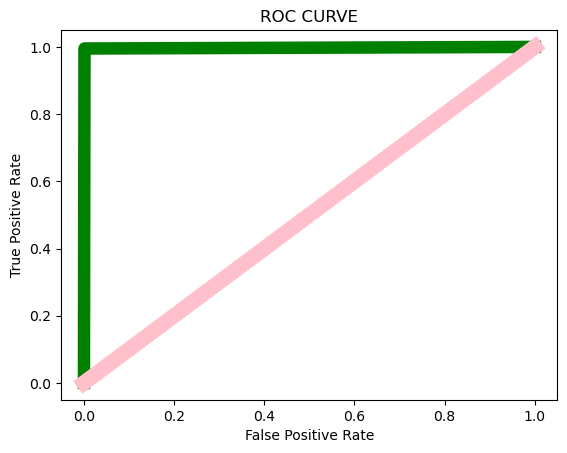

In [163]:
#Plotting roc_auc
plt.figure()
plt.plot(fpr,tpr,color='green',lw=9,label="ROC(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='pink',linestyle="-",lw=11)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.show()

We are getting a perfect curve.

# Saving and predicting the final model

In [164]:
import joblib
joblib.dump(final_model,"Customer_Churn_Analysis.pkl")

['Customer_Churn_Analysis.pkl']

In [166]:
model=joblib.load("Customer_churn_Analysis.pkl")
pred=model.predict(x_test)
pred

array([1, 1, 0, ..., 0, 1, 1])

In [167]:
actual=np.array(y_test)
actual

array([1, 1, 0, ..., 0, 1, 1])

In [168]:
ds=pd.DataFrame({'Actual_Value':actual,"Predicted_Value":pred})
ds

,Actual_Value,Predicted_Value
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
3400,0,0
3401,0,0
3402,0,0
3403,1,1


As we can see our model is performing really well.

#                                ---END---